1. Import data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

print(pd.__version__)

2.2.2


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/BA Dataset/bank-additional.csv', sep=';')

2. Kiểm tra và đọc dữ liệu

In [ ]:
print(df.shape)

(41188, 21)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
type(df)

pandas.core.frame.DataFrame

3. EDA (Phân tích dữ liệu khám phá - Exploratory Data Analysis)

In [ ]:
if 'datetime_is_numeric' in pd.DataFrame.describe.__code__.co_varnames:
    display(df.describe(include='all', datetime_is_numeric=True))
else:
    display(df.describe(include='all'))

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188,41188,41188,41188,41188,41188,41188,41188,41188,...,41188.000000,41188.000000,41188.000000,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188
unique,NaN,12,4,8,3,3,3,2,10,5,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,...,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,36548
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.567593,962.475454,0.172963,NaN,0.081886,93.575664,-40.502600,3.621291,5167.035911,NaN
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.770014,186.910907,0.494901,NaN,1.570960,0.578840,4.628198,1.734447,72.251528,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


In [ ]:
print("\nColumns:", list(df.columns))


Columns: ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']


In [ ]:
print("\nTarget distribution:\n", df['y'].value_counts())
pos_rate = (df['y'] == 'yes').mean()
print(f"Positive rate (y='yes'): {pos_rate:.2%}")


Target distribution:
 y
no     36548
yes     4640
Name: count, dtype: int64
Positive rate (y='yes'): 11.27%


In [ ]:
print("\nMissing values per column:\n", df.isnull().sum())


Missing values per column:
 age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


3. Data visualization

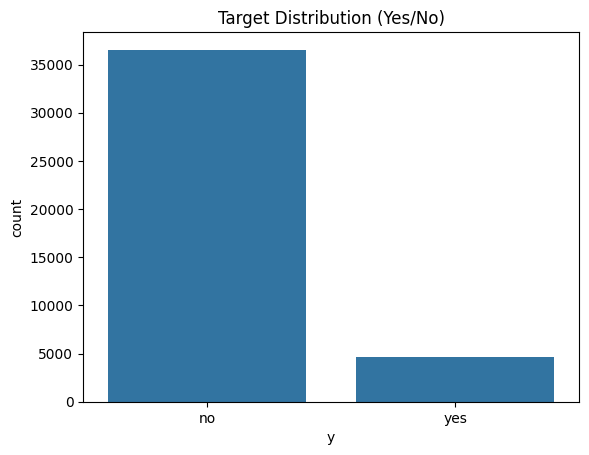

In [ ]:
sns.countplot(x='y', data=df)
plt.title('Target Distribution (Yes/No)')
plt.show()

               age      campaign         pdays      previous  emp.var.rate  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406      2.567593    962.475454      0.172963      0.081886   
std       10.42125      2.770014    186.910907      0.494901      1.570960   
min       17.00000      1.000000      0.000000      0.000000     -3.400000   
25%       32.00000      1.000000    999.000000      0.000000     -1.800000   
50%       38.00000      2.000000    999.000000      0.000000      1.100000   
75%       47.00000      3.000000    999.000000      0.000000      1.400000   
max       98.00000     56.000000    999.000000      7.000000      1.400000   

       cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count    41188.000000   41188.000000  41188.000000  41188.000000  
mean        93.575664     -40.502600      3.621291   5167.035911  
std          0.578840       4.628198      1.734447     72.251528  
min         92.201000     -50

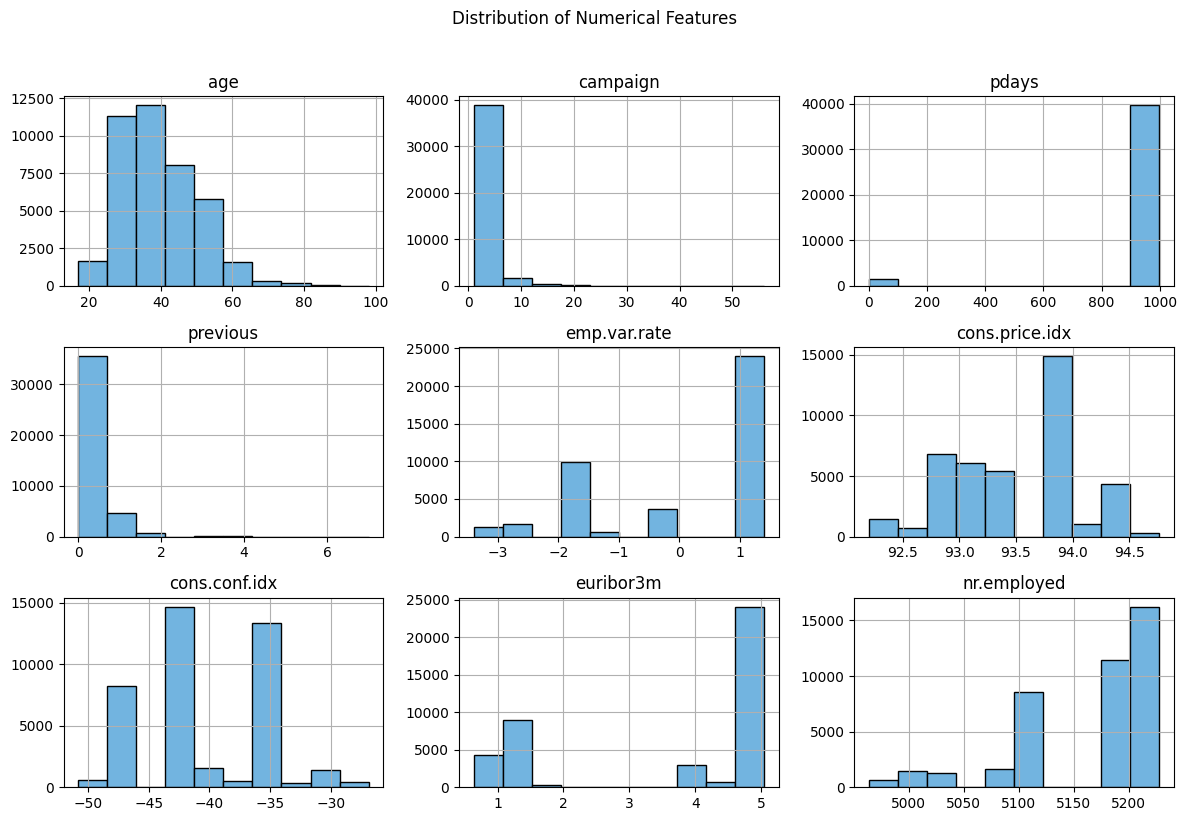

In [ ]:
num_cols = ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
            'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
print(df[num_cols].describe())

df[num_cols].hist(figsize=(12,8), color='#72B4E0', edgecolor='black')
plt.suptitle('Distribution of Numerical Features', y=1.02)
plt.tight_layout()
plt.show()

/tmp/ipython-input-2601460132.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set3',


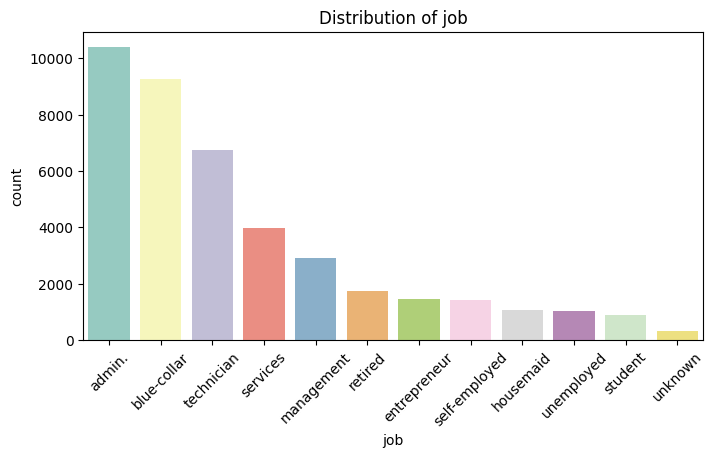

/tmp/ipython-input-2601460132.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set3',


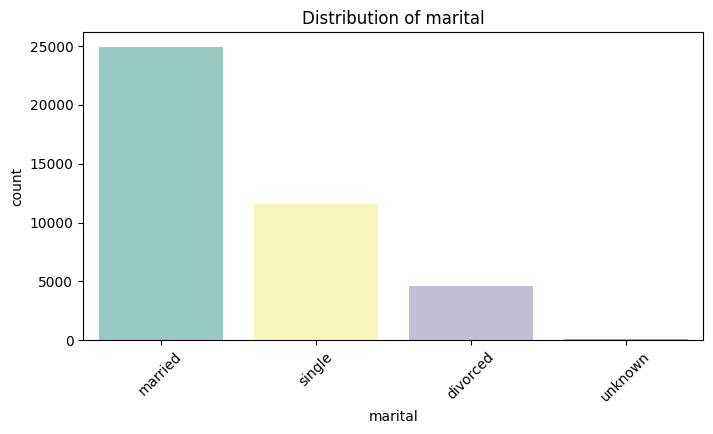

/tmp/ipython-input-2601460132.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set3',


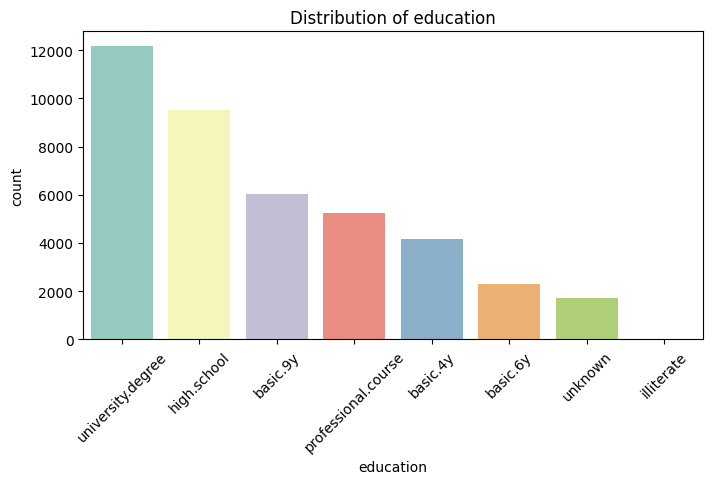

/tmp/ipython-input-2601460132.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set3',


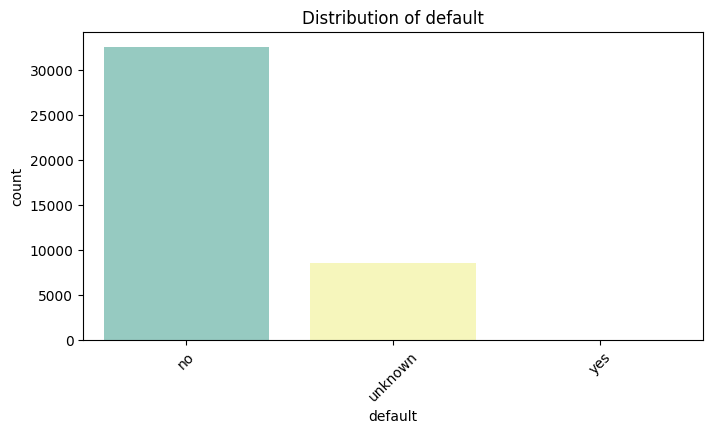

/tmp/ipython-input-2601460132.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set3',


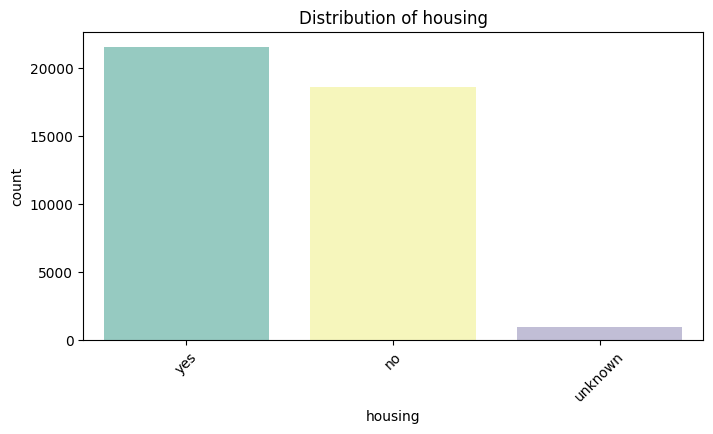

/tmp/ipython-input-2601460132.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set3',


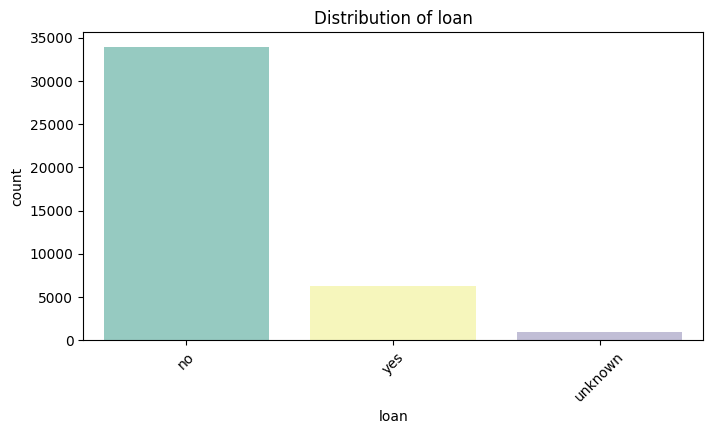

/tmp/ipython-input-2601460132.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set3',


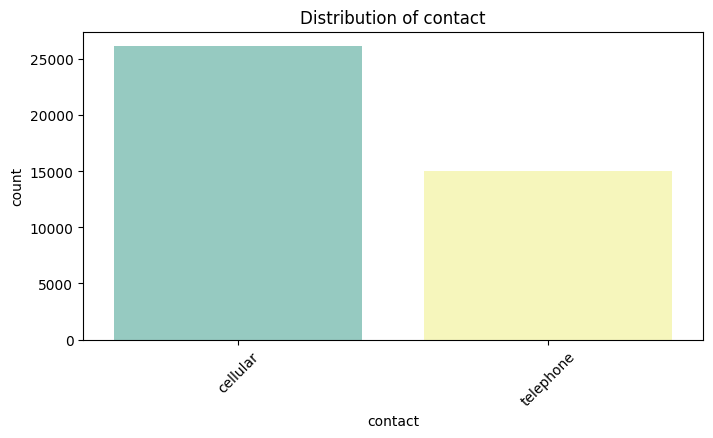

/tmp/ipython-input-2601460132.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set3',


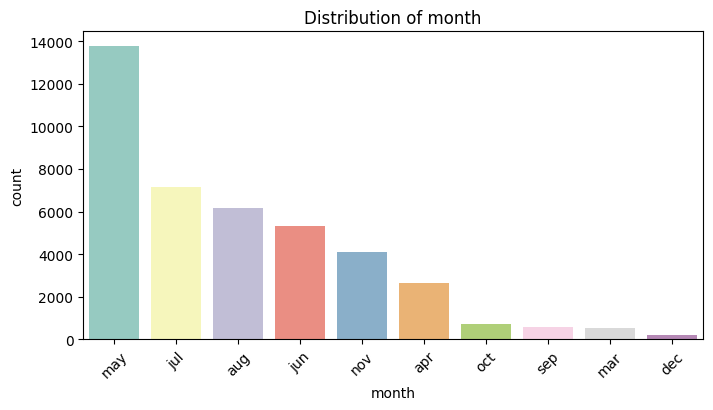

/tmp/ipython-input-2601460132.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set3',


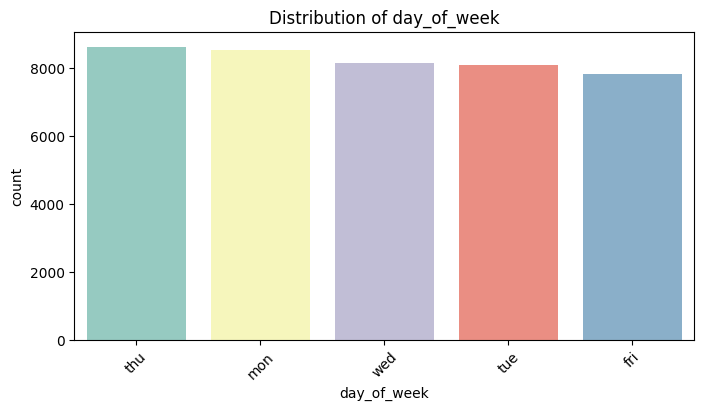

/tmp/ipython-input-2601460132.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set3',


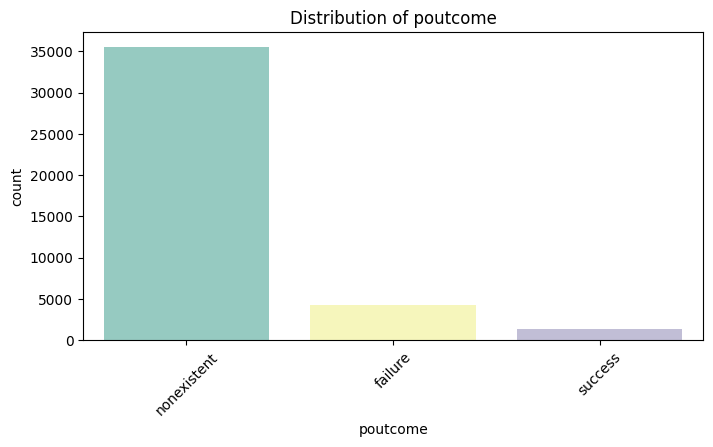

In [ ]:
cat_cols = ['job', 'marital', 'education', 'default',
            'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

for col in cat_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(x=col, data=df, palette='Set3',
                  order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

4. Data Cleaning & Preprocessing

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [ ]:
# 1) LÀM SẠCH CƠ BẢN
#   - Thay 'unknown' -> NaN (để xử lý missing đúng chuẩn)
#   - Bỏ cột 'duration' (tránh data leakage)
#   - Kiểm tra missing
# ------------------------------------------------------------
df = df.replace('unknown', np.nan)

if 'duration' in df.columns:
    df = df.drop(columns=['duration'])

print("\nMissing after 'unknown'->NaN (top 10):")
print(df.isnull().sum().sort_values(ascending=False).head(10))

# ------------------------------------------------------------
# 2) XỬ LÝ ĐẶC THÙ THEO EDA
#   - pdays: 999 -> NaN; tạo cờ was_contacted_before (0/1)
#   - Log-transform: campaign, previous -> giảm outlier
#   - (Tuỳ chọn) Loại 'default' nếu gần như không biến thiên
#   - (Tuỳ chọn) Gom nhóm hiếm trong job/education/poutcome
# ------------------------------------------------------------
if 'pdays' in df.columns:
    df['pdays'] = df['pdays'].replace(999, np.nan)
    df['was_contacted_before'] = np.where(df['pdays'].isna(), 0, 1).astype(int)

for col in ['campaign', 'previous']:
    if col in df.columns:
        df[col + '_log'] = np.log1p(df[col])  # log(1+x) an toàn với 0/NaN

# Loại 'default' nếu >95% một giá trị (gần như không có thông tin)
if 'default' in df.columns:
    top_ratio = df['default'].value_counts(normalize=True, dropna=False).max()
    if top_ratio > 0.95:
        df = df.drop(columns=['default'])

# Gom nhóm hiếm để giảm độ thưa One-Hot (tuỳ chọn)
def lump_rare(series, min_freq=0.01):
    freq = series.value_counts(normalize=True)
    rare = freq[freq < min_freq].index
    return series.where(~series.isin(rare), other='other')

for c in ['job', 'education', 'poutcome']:
    if c in df.columns:
        df[c] = lump_rare(df[c], min_freq=0.01)

print("\nAfter feature engineering:")
print("Columns:", len(df.columns))

# ------------------------------------------------------------
# 3) TÁCH FEATURES/TARGET + CHIA TRAIN/TEST (stratify=y)
# ------------------------------------------------------------
X = df.drop(columns=['y'])
y = (df['y'] == 'yes').astype(int)

X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=42, stratify=y
)

print("\nTrain/Test shapes:", X_train.shape, X_test.shape)
print("Target distribution (train):")
print(y_train.value_counts(normalize=True))

# ------------------------------------------------------------
# 4) TÁCH CỘT SỐ / CỘT CHỮ
# ------------------------------------------------------------
num_cols = X_train.select_dtypes(exclude=['object']).columns.tolist()
cat_cols = X_train.select_dtypes(include=['object']).columns.tolist()

print("\nNumeric cols ({}):".format(len(num_cols)), num_cols)
print("Categorical cols ({}):".format(len(cat_cols)), cat_cols)

# ------------------------------------------------------------
# 5) IMPUTE
#   - Numeric: median (robust cho lệch/phình đuôi)
#   - Categorical: most_frequent
# ------------------------------------------------------------
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

X_train_num = pd.DataFrame(num_imputer.fit_transform(X_train[num_cols]),
    columns=num_cols, index=X_train.index)
X_test_num = pd.DataFrame(num_imputer.transform(X_test[num_cols]),
    columns=num_cols, index=X_test.index)

X_train_cat = pd.DataFrame(cat_imputer.fit_transform(X_train[cat_cols]),
    columns=cat_cols, index=X_train.index)
X_test_cat = pd.DataFrame(cat_imputer.transform(X_test[cat_cols]),
    columns=cat_cols, index=X_test.index)

# ------------------------------------------------------------
# 6) SCALE NUMERIC
# ------------------------------------------------------------
scaler = StandardScaler()
X_train_num_scaled = pd.DataFrame(scaler.fit_transform(X_train_num),
    columns=num_cols, index=X_train.index)
X_test_num_scaled = pd.DataFrame(scaler.transform(X_test_num),
    columns=num_cols, index=X_test.index)

# ------------------------------------------------------------
# 7)ơn ONE-HOT ENCODE CATEGORICAL (tưg thích nhiều phiên bản sklearn)
# ------------------------------------------------------------
try:
    # sklearn >=1.2
    ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
except TypeError:
    # sklearn cũ
    ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

X_train_cat_encoded = pd.DataFrame(ohe.fit_transform(X_train_cat),
    columns=ohe.get_feature_names_out(cat_cols),
    index=X_train.index)
X_test_cat_encoded = pd.DataFrame(ohe.transform(X_test_cat),
    columns=ohe.get_feature_names_out(cat_cols),
    index=X_test.index)

# ------------------------------------------------------------
# 8) GHÉP DỮ LIỆU ĐÃ XỬ LÝ
# ------------------------------------------------------------
X_train_prepared = pd.concat([X_train_num_scaled, X_train_cat_encoded], axis=1)
X_test_prepared  = pd.concat([X_test_num_scaled,  X_test_cat_encoded],  axis=1)

print("\n✅ PREPROCESSING DONE")
print("X_train_prepared:", X_train_prepared.shape)
print("X_test_prepared :", X_test_prepared.shape)

# ------------------------------------------------------------
# 9) (TUỲ CHỌN) LƯU RA FILE để dùng ở bước mô hình / báo cáo
# ------------------------------------------------------------
save_outputs = True  # đổi False nếu bạn không muốn lưu

if save_outputs:
    X_train_prepared.to_csv('/content/X_train_prepared.csv', index=False)
    X_test_prepared.to_csv('/content/X_test_prepared.csv', index=False)
    y_train.to_csv('/content/y_train.csv', index=False)
    y_test.to_csv('/content/y_test.csv', index=False)

    # Lưu các "bộ biến đổi" để suy luận/triển khai sau này (dùng pickle)
    import pickle
    with open('/content/prep_num_imputer.pkl', 'wb') as f: pickle.dump(num_imputer, f)
    with open('/content/prep_cat_imputer.pkl', 'wb') as f: pickle.dump(cat_imputer, f)
    with open('/content/prep_scaler.pkl', 'wb') as f: pickle.dump(scaler, f)
    with open('/content/prep_ohe.pkl', 'wb') as f: pickle.dump(ohe, f)

    print("\n📦 Saved files to /content/:")
    print("- X_train_prepared.csv, X_test_prepared.csv")
    print("- y_train.csv, y_test.csv")
    print("- prep_num_imputer.pkl, prep_cat_imputer.pkl, prep_scaler.pkl, prep_ohe.pkl")


Missing after 'unknown'->NaN (top 10):
default        8597
education      1731
housing         990
loan            990
job             330
marital          80
age               0
contact           0
month             0
day_of_week       0
dtype: int64

After feature engineering:
Columns: 23

Train/Test shapes: (32950, 22) (8238, 22)
Target distribution (train):
y
0    0.887344
1    0.112656
Name: proportion, dtype: float64

Numeric cols (12): ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'was_contacted_before', 'campaign_log', 'previous_log']
Categorical cols (10): ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

✅ PREPROCESSING DONE
X_train_prepared: (32950, 59)
X_test_prepared : (8238, 59)

📦 Saved files to /content/:
- X_train_prepared.csv, X_test_prepared.csv
- y_train.csv, y_test.csv
- prep_num_imputer.pkl, prep_cat_imputer.pkl, prep_scaler.pkl, p

5. Model Building and Evaluation

5.1. Train 2 mô hình cơ sở (Baseline): Decision Tree (entropy) & Logistic Regression

In [ ]:
# ============================================================
# STEP 4 — BASELINE MODELS
# ============================================================
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Decision Tree (Entropy / Information Gain)
dt_base = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=5,            # baseline: 5 (sẽ tối ưu sau)
    min_samples_leaf=1,
    random_state=42)
dt_base.fit(X_train_prepared, y_train)

# Logistic Regression (baseline)
log_base = LogisticRegression(
    max_iter=2000,
    solver='lbfgs',
    random_state=42)
log_base.fit(X_train_prepared, y_train)

print("✅ Đã huấn luyện baseline: dt_base & log_base")


✅ Đã huấn luyện baseline: dt_base & log_base


5.2. Đánh giá baseline (Accuracy, Precision, Recall, F1, ROC-AUC, Confusion Matrix)


=== Decision Tree (baseline, entropy) ===
Accuracy : 0.9035
Precision: 0.6928
Recall   : 0.2575
F1-score : 0.3755
ROC AUC  : 0.7924
Confusion Matrix:
 [[7204  106]
 [ 689  239]]
TP=239, FP=106, FN=689, TN=7204
Support (pos=928, neg=7310)


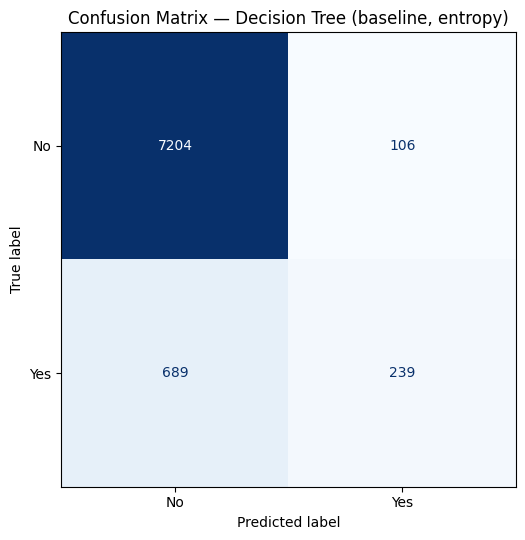


=== Logistic Regression (baseline) ===
Accuracy : 0.9013
Precision: 0.6976
Recall   : 0.2188
F1-score : 0.3331
ROC AUC  : 0.8009
Confusion Matrix:
 [[7222   88]
 [ 725  203]]
TP=203, FP=88, FN=725, TN=7222
Support (pos=928, neg=7310)


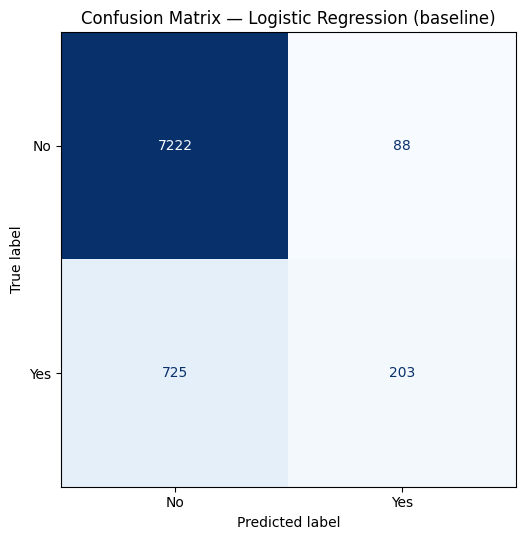

,Model,Accuracy,Precision,Recall,F1,ROC_AUC,TP,FP,FN,TN,Support_Pos,Support_Neg
0,"Decision Tree (baseline, entropy)",0.903496,0.692754,0.257543,0.375491,0.792400,239,106,689,7204,928,7310
1,Logistic Regression (baseline),0.901311,0.697595,0.218750,0.333060,0.800854,203,88,725,7222,928,7310


In [ ]:
# ============================================================
# STEP 5 — EVALUATION (BASELINE)
# ============================================================
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             roc_auc_score, confusion_matrix, ConfusionMatrixDisplay)
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def eval_model(y_true, y_pred, y_proba, name="Model"):
    # Metrics
    acc  = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, zero_division=0)
    rec  = recall_score(y_true, y_pred, zero_division=0)
    f1   = f1_score(y_true, y_pred, zero_division=0)
    auc  = roc_auc_score(y_true, y_proba)

    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Try to unpack TN, FP, FN, TP if binary 2x2
    tn = fp = fn = tp = None
    support_pos = support_neg = None
    if cm.shape == (2, 2):
        tn, fp, fn, tp = cm.ravel()
        support_pos = tp + fn
        support_neg = tn + fp

    # Print block
    print(f"\n=== {name} ===")
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1-score : {f1:.4f}")
    print(f"ROC AUC  : {auc:.4f}")
    print("Confusion Matrix:\n", cm)
    if tn is not None:
        print(f"TP={tp}, FP={fp}, FN={fn}, TN={tn}")
        print(f"Support (pos={support_pos}, neg={support_neg})")

    # Plot confusion matrix (preferred: from_predictions)
    fig, ax = plt.subplots(figsize=(7, 5.5))
    # If your labels are 0/1, you can give display_labels=['No','Yes']
    ConfusionMatrixDisplay.from_predictions(
        y_true, y_pred,
        display_labels=['No', 'Yes'],
        cmap='Blues',
        colorbar=False,
        ax=ax
    )
    ax.set_title(f"Confusion Matrix — {name}")
    ax.set_xlabel("Predicted label")
    ax.set_ylabel("True label")
    plt.tight_layout()
    plt.show()

    return {
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1': f1,
        'ROC_AUC': auc,
        'TP': tp, 'FP': fp, 'FN': fn, 'TN': tn,
        'Support_Pos': support_pos, 'Support_Neg': support_neg
    }

# === Predict & evaluate (giữ nguyên phần dưới của bạn) ===
y_pred_dt_base  = dt_base.predict(X_test_prepared)
y_proba_dt_base = dt_base.predict_proba(X_test_prepared)[:, 1]

y_pred_log_base  = log_base.predict(X_test_prepared)
y_proba_log_base = log_base.predict_proba(X_test_prepared)[:, 1]

results_base = []
results_base.append(eval_model(y_test, y_pred_dt_base,  y_proba_dt_base,  "Decision Tree (baseline, entropy)"))
results_base.append(eval_model(y_test, y_pred_log_base, y_proba_log_base, "Logistic Regression (baseline)"))

results_base_df = pd.DataFrame(results_base)
display(results_base_df)

5.3. Vẽ ROC Curve so sánh baseline

<Figure size 700x600 with 0 Axes>

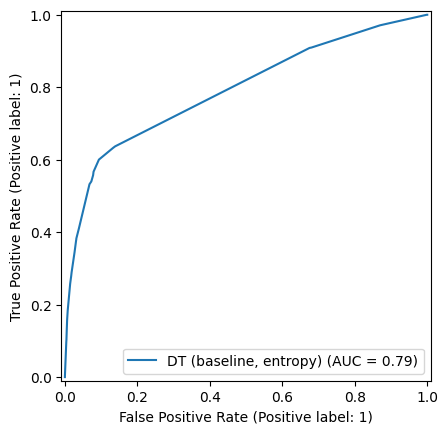

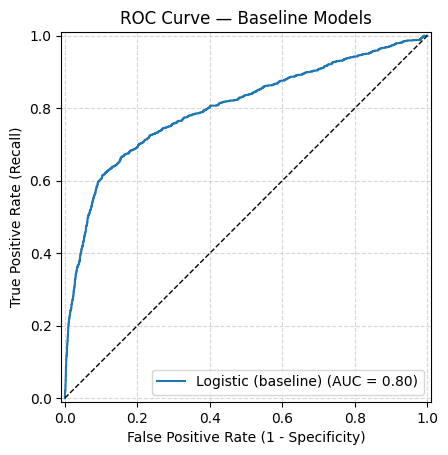

In [ ]:
# ============================================================
# STEP 6 — ROC CURVE (BASELINE)
# ============================================================
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

plt.figure(figsize=(7,6))
RocCurveDisplay.from_predictions(y_test, y_proba_dt_base,  name="DT (baseline, entropy)")
RocCurveDisplay.from_predictions(y_test, y_proba_log_base, name="Logistic (baseline)")
plt.plot([0,1], [0,1], 'k--', lw=1)
plt.title("ROC Curve — Baseline Models")
plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Recall)")
plt.legend(loc="lower right")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

5.4. GridSearchCV cho Decision Tree (entropy)

Fitting 5 folds for each of 600 candidates, totalling 3000 fits

✅ GridSearch DT xong
Best params: {'ccp_alpha': 0.0005, 'class_weight': 'balanced', 'max_depth': None, 'min_samples_leaf': 100, 'min_samples_split': 2}
Best CV ROC-AUC: 0.7888288053501674

=== Decision Tree (best on test, th=0.5) ===

=== DT (best, entropy) ===
Accuracy : 0.8254
Precision: 0.3556
Recall   : 0.6767
F1-score : 0.4662
ROC AUC  : 0.8145
Confusion Matrix:
 [[6172 1138]
 [ 300  628]]
TP=628, FP=1138, FN=300, TN=6172
Support (pos=928, neg=7310)


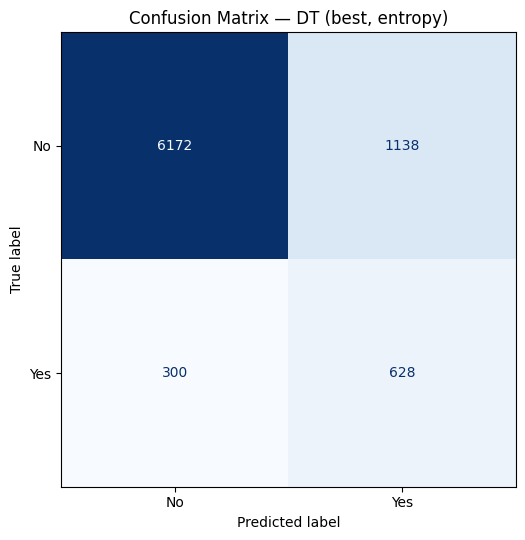

In [ ]:
# ============================================================
# STEP 7 — GRID SEARCH (DECISION TREE, ENTROPY)
# ============================================================
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='entropy', random_state=42)
param_grid_dt = {
    'max_depth': [3, 5, 7, 9, None],
    'min_samples_leaf': [1, 10, 20, 50, 100],
    'min_samples_split': [2, 5, 10, 20],
    'class_weight': [None, 'balanced'],
    'ccp_alpha': [0.0, 0.0005, 0.001]
}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_dt = GridSearchCV(estimator=dt,
    param_grid=param_grid_dt,
    scoring='roc_auc',
    cv=cv,
    n_jobs=-1,
    verbose=1
)
grid_dt.fit(X_train_prepared, y_train)

best_tree = grid_dt.best_estimator_
print("\n✅ GridSearch DT xong")
print("Best params:", grid_dt.best_params_)
print("Best CV ROC-AUC:", grid_dt.best_score_)

# Test set
from sklearn.metrics import roc_auc_score
y_proba_dt_best = best_tree.predict_proba(X_test_prepared)[:, 1]
y_pred_dt_best  = (y_proba_dt_best >= 0.5).astype(int)

print("\n=== Decision Tree (best on test, th=0.5) ===")
_ = eval_model(y_test, y_pred_dt_best, y_proba_dt_best, "DT (best, entropy)")

5.5. GridSearchCV cho Logistic Regression

Fitting 5 folds for each of 60 candidates, totalling 300 fits

✅ GridSearch Logistic xong
Best params: {'C': 0.5, 'class_weight': 'balanced', 'max_iter': 2000, 'penalty': 'l2', 'solver': 'liblinear'}
Best CV ROC-AUC: 0.790252432324472

=== Logistic Regression (best on test, th=0.5) ===

=== Logistic (best) ===
Accuracy : 0.8333
Precision: 0.3646
Recall   : 0.6455
F1-score : 0.4660
ROC AUC  : 0.8011
Confusion Matrix:
 [[6266 1044]
 [ 329  599]]
TP=599, FP=1044, FN=329, TN=6266
Support (pos=928, neg=7310)


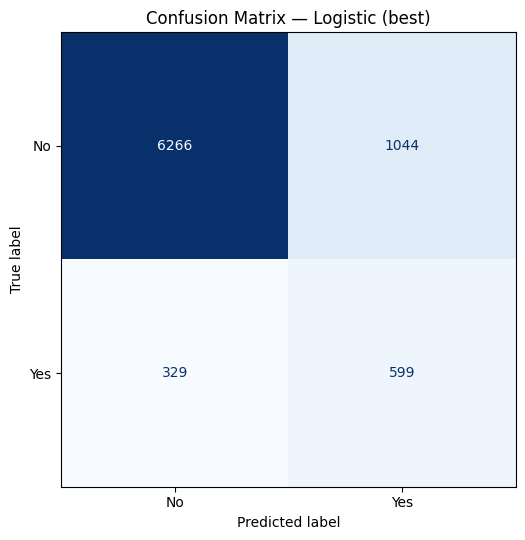

In [ ]:
# ============================================================
# STEP 8 — GRID SEARCH (LOGISTIC REGRESSION)
# ============================================================
from sklearn.linear_model import LogisticRegression

param_grids_log = [
    {
        'solver': ['liblinear'],
        'penalty': ['l1', 'l2'],
        'C': [0.05, 0.1, 0.5, 1.0, 2.0, 5.0],
        'class_weight': [None, 'balanced'],
        'max_iter': [2000],
    },
    {
        'solver': ['lbfgs'],
        'penalty': ['l2'],
        'C': [0.05, 0.1, 0.5, 1.0, 2.0, 5.0],
        'class_weight': [None, 'balanced'],
        'max_iter': [2000],
    },
    {
        'solver': ['saga'],
        'penalty': ['l1', 'l2'],
        'C': [0.05, 0.1, 0.5, 1.0, 2.0, 5.0],
        'class_weight': [None, 'balanced'],
        'max_iter': [2000],
    },
]

grid_log = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid=param_grids_log,
    scoring='roc_auc',
    cv=cv,
    n_jobs=-1,
    verbose=1
)
grid_log.fit(X_train_prepared, y_train)

best_log = grid_log.best_estimator_
print("\n✅ GridSearch Logistic xong")
print("Best params:", grid_log.best_params_)
print("Best CV ROC-AUC:", grid_log.best_score_)

y_proba_log_best = best_log.predict_proba(X_test_prepared)[:, 1]
y_pred_log_best  = (y_proba_log_best >= 0.5).astype(int)

print("\n=== Logistic Regression (best on test, th=0.5) ===")
_ = eval_model(y_test, y_pred_log_best, y_proba_log_best, "Logistic (best)")

5.6. Tối ưu ngưỡng (threshold) theo chi phí kinh doanh cho từng mô hình

In [ ]:
# ============================================================
# STEP 9 — COST-SENSITIVE THRESHOLD TUNING
# ============================================================
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix

# Cấu hình chi phí (điều chỉnh theo doanh nghiệp)
COST_FP = 1.5
COST_FN = 20.0
COST_TP = -5.0
COST_TN = 0.0

def expected_cost(y_true, y_proba, threshold=0.5):
    y_pred = (y_proba >= threshold).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    total_cost = tp*COST_TP + fp*COST_FP + fn*COST_FN + tn*COST_TN
    return total_cost / len(y_true)

def sweep_thresholds(y_true, y_proba, name):
    thresholds = np.linspace(0.01, 0.99, 99)
    rows = []
    for t in thresholds:
        rows.append({'threshold': t, 'avg_cost': expected_cost(y_true, y_proba, t)})
    df_cost = pd.DataFrame(rows).sort_values('avg_cost')
    print(f"\nTop 5 threshold (min avg cost) — {name}")
    display(df_cost.head(5))
    best_t  = float(df_cost.iloc[0]['threshold'])
    best_ac = float(df_cost.iloc[0]['avg_cost'])
    return best_t, best_ac, df_cost

# Best threshold cho từng mô hình
dt_best_th,  dt_best_cost,  dt_cost_df  = sweep_thresholds(y_test, y_proba_dt_best,  "DT (best)")
log_best_th, log_best_cost, log_cost_df = sweep_thresholds(y_test, y_proba_log_best, "Logistic (best)")


Top 5 threshold (min avg cost) — DT (best)


,threshold,avg_cost
36,0.37,0.454479
34,0.35,0.458667
33,0.34,0.458667
35,0.36,0.458667
31,0.32,0.470503



Top 5 threshold (min avg cost) — Logistic (best)


,threshold,avg_cost
36,0.37,0.514931
34,0.35,0.517541
35,0.36,0.518026
37,0.38,0.521425
38,0.39,0.522457


5.7. Chốt WINNER theo chi phí tối ưu

In [ ]:
# ============================================================
# STEP 10 — PICK WINNER (THEO AVG COST)
# ============================================================
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def metrics_at(y_true, y_proba, th, name):
    y_pred = (y_proba >= th).astype(int)
    return {
        'Model': name,
        'Threshold': th,
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred, zero_division=0),
        'Recall': recall_score(y_true, y_pred, zero_division=0),
        'F1': f1_score(y_true, y_pred, zero_division=0),
        'ROC_AUC': roc_auc_score(y_true, y_proba),
        'Avg_Cost': expected_cost(y_true, y_proba, th)
    }

summary = pd.DataFrame([
    metrics_at(y_test, y_proba_dt_best,  dt_best_th,  "DT (best @th*)"),
    metrics_at(y_test, y_proba_log_best, log_best_th, "Logistic (best @th*)")
]).sort_values('Avg_Cost')
display(summary)

winner_row = summary.iloc[0]
print(f"\n🏆 WINNER: {winner_row['Model']}  @ threshold={winner_row['Threshold']:.3f}  "
      f"(Avg Cost={winner_row['Avg_Cost']:.6f})")

,Model,Threshold,Accuracy,Precision,Recall,F1,ROC_AUC,Avg_Cost
0,DT (best @th*),0.37,0.667638,0.225924,0.803879,0.352719,0.814542,0.454479
1,Logistic (best @th*),0.37,0.695800,0.236825,0.765086,0.361691,0.801104,0.514931



🏆 WINNER: DT (best @th*)  @ threshold=0.370  (Avg Cost=0.454479)


5.8. ROC của mô hình đã tối ưu (và baseline để tham chiếu)

<Figure size 700x600 with 0 Axes>

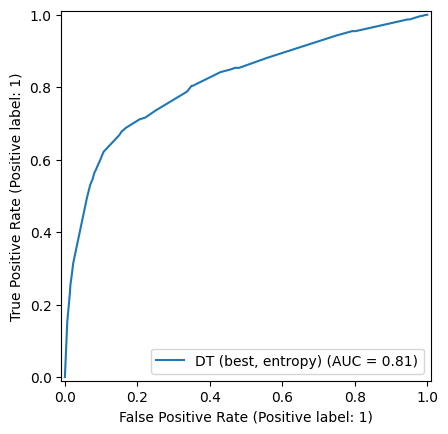

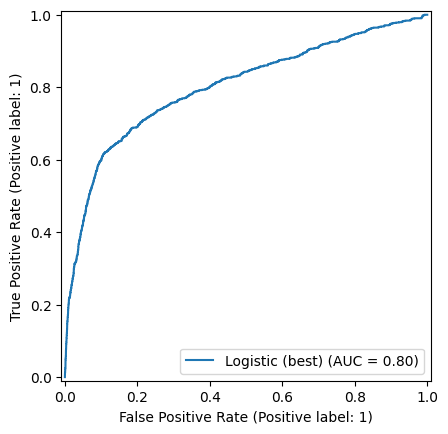

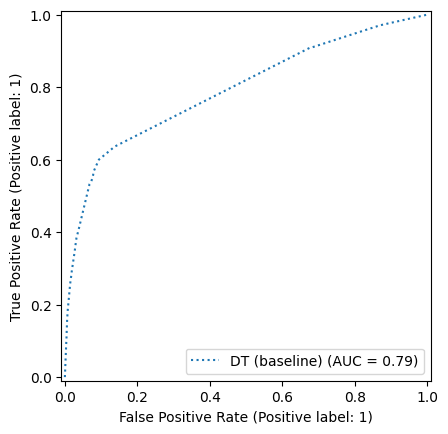

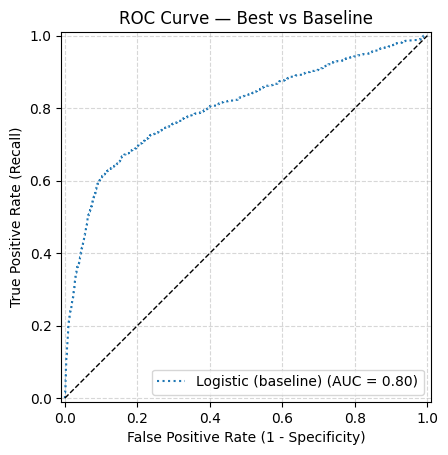

In [ ]:
# ============================================================
# STEP 11 — ROC CURVE (BEST MODELS)
# ============================================================
plt.figure(figsize=(7,6))
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(y_test, y_proba_dt_best,  name="DT (best, entropy)")
RocCurveDisplay.from_predictions(y_test, y_proba_log_best, name="Logistic (best)")
# Tham chiếu thêm baseline:
RocCurveDisplay.from_predictions(y_test, y_proba_dt_base,  name="DT (baseline)",  linestyle=':')
RocCurveDisplay.from_predictions(y_test, y_proba_log_base, name="Logistic (baseline)", linestyle=':')

plt.plot([0,1], [0,1], 'k--', lw=1)
plt.title("ROC Curve — Best vs Baseline")
plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Recall)")
plt.legend(loc="lower right")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

5.8.1. Vẽ luôn 2 đường baseline và best trong 1 hình ROC curve

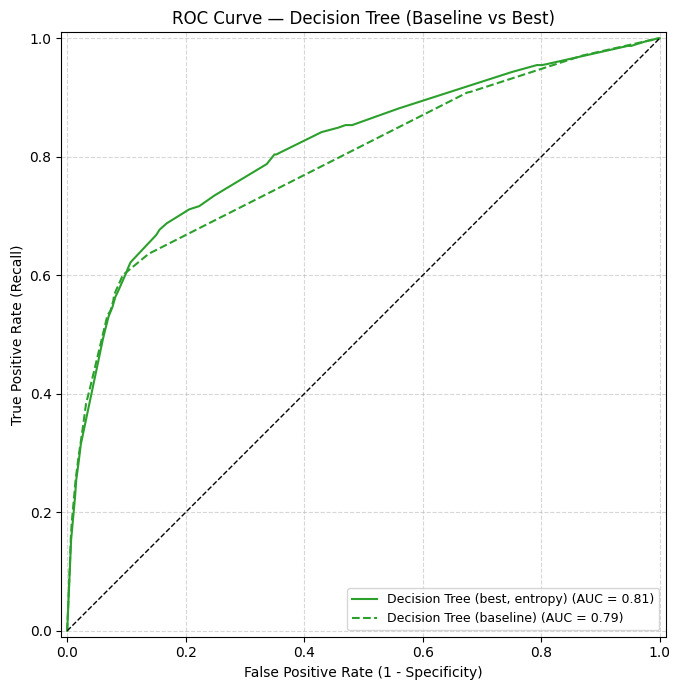

In [ ]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

# === ROC Curve — Decision Tree (Baseline vs Best) ===
fig, ax = plt.subplots(figsize=(8,7))

# Đường cho mô hình tốt nhất (best, liền nét)
RocCurveDisplay.from_predictions(
    y_test, y_proba_dt_best,
    name="Decision Tree (best, entropy)",
    color="#2ca02c", ax=ax
)

# Đường cho baseline (đứt nét)
disp = RocCurveDisplay.from_predictions(
    y_test, y_proba_dt_base,
    name="Decision Tree (baseline)",
    color="#2ca02c", ax=ax
)
disp.line_.set_linestyle("--")  # chuyển baseline thành đường đứt nét

# Đường tham chiếu
ax.plot([0,1], [0,1], 'k--', lw=1)

# Format biểu đồ
ax.set_title("ROC Curve — Decision Tree (Baseline vs Best)")
ax.set_xlabel("False Positive Rate (1 - Specificity)")
ax.set_ylabel("True Positive Rate (Recall)")
ax.legend(loc="lower right", fontsize=9)
ax.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

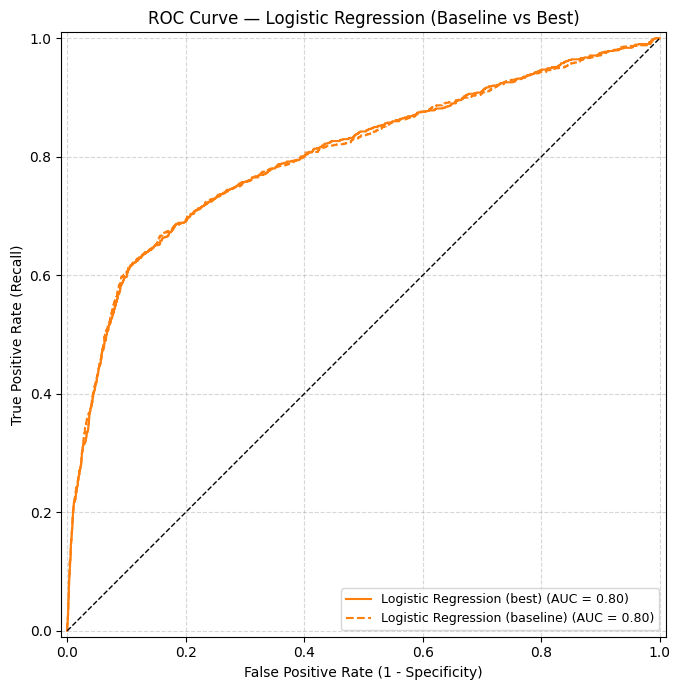

In [ ]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

# === ROC Curve — Logistic Regression (Baseline vs Best) ===
fig, ax = plt.subplots(figsize=(8,7))

# Đường cho mô hình tốt nhất (best, liền nét)
RocCurveDisplay.from_predictions(
    y_test, y_proba_log_best,
    name="Logistic Regression (best)",
    color="#ff7f0e", ax=ax   # màu cam
)

# Đường cho baseline (đứt nét)
disp = RocCurveDisplay.from_predictions(
    y_test, y_proba_log_base,
    name="Logistic Regression (baseline)",
    color="#ff7f0e", ax=ax
)
disp.line_.set_linestyle("--")  # đổi baseline thành đường đứt nét

# Đường tham chiếu (random model)
ax.plot([0,1], [0,1], 'k--', lw=1)

# Format biểu đồ
ax.set_title("ROC Curve — Logistic Regression (Baseline vs Best)")
ax.set_xlabel("False Positive Rate (1 - Specificity)")
ax.set_ylabel("True Positive Rate (Recall)")
ax.legend(loc="lower right", fontsize=9)
ax.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

5.9. Diễn giải: Feature Importances (DT) & Coefficients (Logistic)

In [ ]:
# ============================================================
# STEP 12 — INTERPRETABILITY
# ============================================================
import numpy as np

# Feature importance — Decision Tree
fi = pd.Series(best_tree.feature_importances_, index=X_train_prepared.columns)\
       .sort_values(ascending=False).head(25)
print("\nTop 25 Feature Importances — Decision Tree (best):")
display(fi)

# Coefficients — Logistic (theo độ lớn tuyệt đối)
try:
    coef = pd.Series(best_log.coef_[0], index=X_train_prepared.columns)\
             .sort_values(key=np.abs, ascending=False).head(25)
    print("\nTop 25 Coefficients (|value|) — Logistic (best):")
    display(coef)
except Exception as e:
    print("Không hiển thị được coefficients:", e)


Top 25 Feature Importances — Decision Tree (best):


,0
nr.employed,0.671359
cons.conf.idx,0.126552
was_contacted_before,0.050612
cons.price.idx,0.040207
euribor3m,0.031349
month_oct,0.020738
month_mar,0.016472
age,0.014163
campaign,0.009750
education_university.degree,0.007995



Top 25 Coefficients (|value|) — Logistic (best):


,0
emp.var.rate,-1.686865
month_mar,1.086478
cons.price.idx,0.772910
month_may,-0.688582
month_jun,-0.537513
month_nov,-0.516362
euribor3m,0.428332
job_retired,0.367835
contact_telephone,-0.321661
was_contacted_before,0.299866


6. Vẽ biểu đồ kết quả trực quan

6.1. Vẽ biểu đồ thanh cho Feature Importances (đẹp hơn bảng)

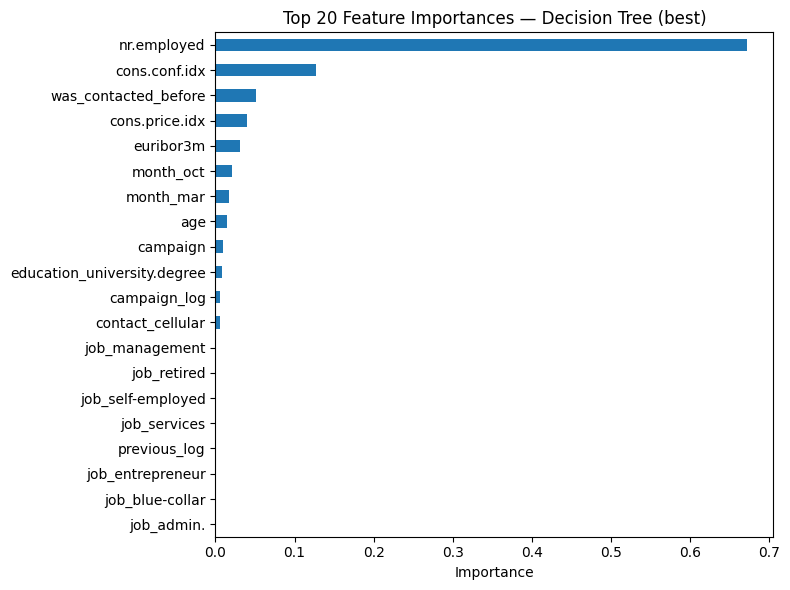

In [ ]:
import matplotlib.pyplot as plt

topk = 20
fi_top = fi.head(topk)  # fi đã có ở STEP 12 của bạn

plt.figure(figsize=(8, 6))
fi_top.sort_values().plot(kind='barh')
plt.title(f"Top {topk} Feature Importances — Decision Tree (best)")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

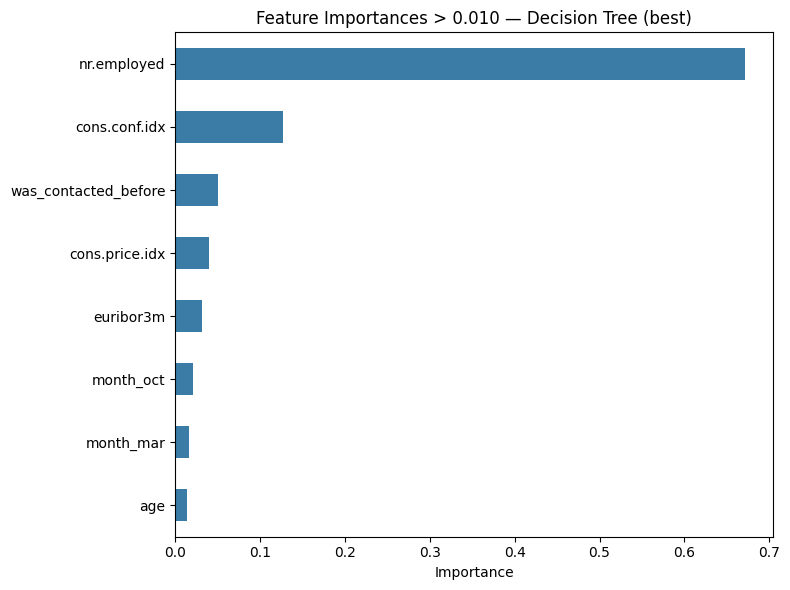


✅ Showing 8 significant features (importance > 0.01).


,0
nr.employed,0.671359
cons.conf.idx,0.126552
was_contacted_before,0.050612
cons.price.idx,0.040207
euribor3m,0.031349
month_oct,0.020738
month_mar,0.016472
age,0.014163


In [ ]:
# ==== Show only meaningful features (importance > threshold) ====
threshold = 0.01   # bạn có thể đổi 0.005 hoặc 0.02 tùy độ lọc mong muốn
fi_sig = fi[fi > threshold].sort_values(ascending=False)

if fi_sig.empty:
    print(f"No features exceed the threshold ({threshold}) — showing top 20 instead.")
    fi_sig = fi.head(20)

plt.figure(figsize=(8, 6))
fi_sig.sort_values().plot(kind='barh', color="#3A7CA5")
plt.title(f"Feature Importances > {threshold:.3f} — Decision Tree (best)")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

print(f"\n✅ Showing {len(fi_sig)} significant features (importance > {threshold}).")
display(fi_sig)

6.2. Vẽ cây quyết định (chỉ hiển thị vài tầng đầu để dễ đọc)

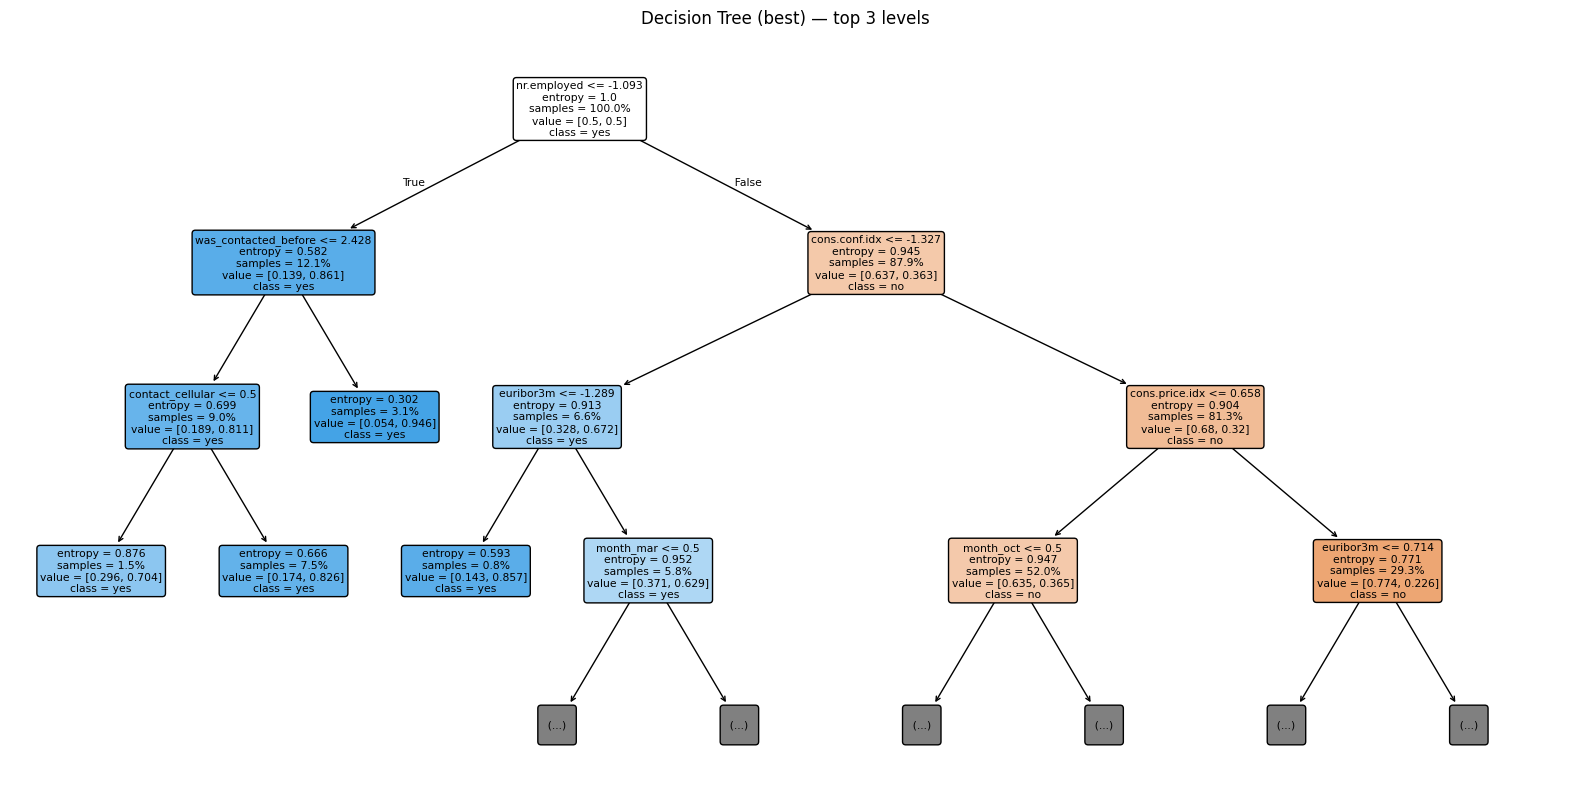

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(
    best_tree,
    feature_names=X_train_prepared.columns,
    class_names=['no', 'yes'],
    filled=True,
    rounded=True,
    impurity=True,
    proportion=True,
    max_depth=3   # chỉ vẽ 3 tầng đầu cho dễ quan sát
)
plt.title("Decision Tree (best) — top 3 levels")
plt.show()

6.3. Nếu bạn muốn một cây “giải thích” gọn gàng hơn, có thể huấn luyện surrogate tree nông:

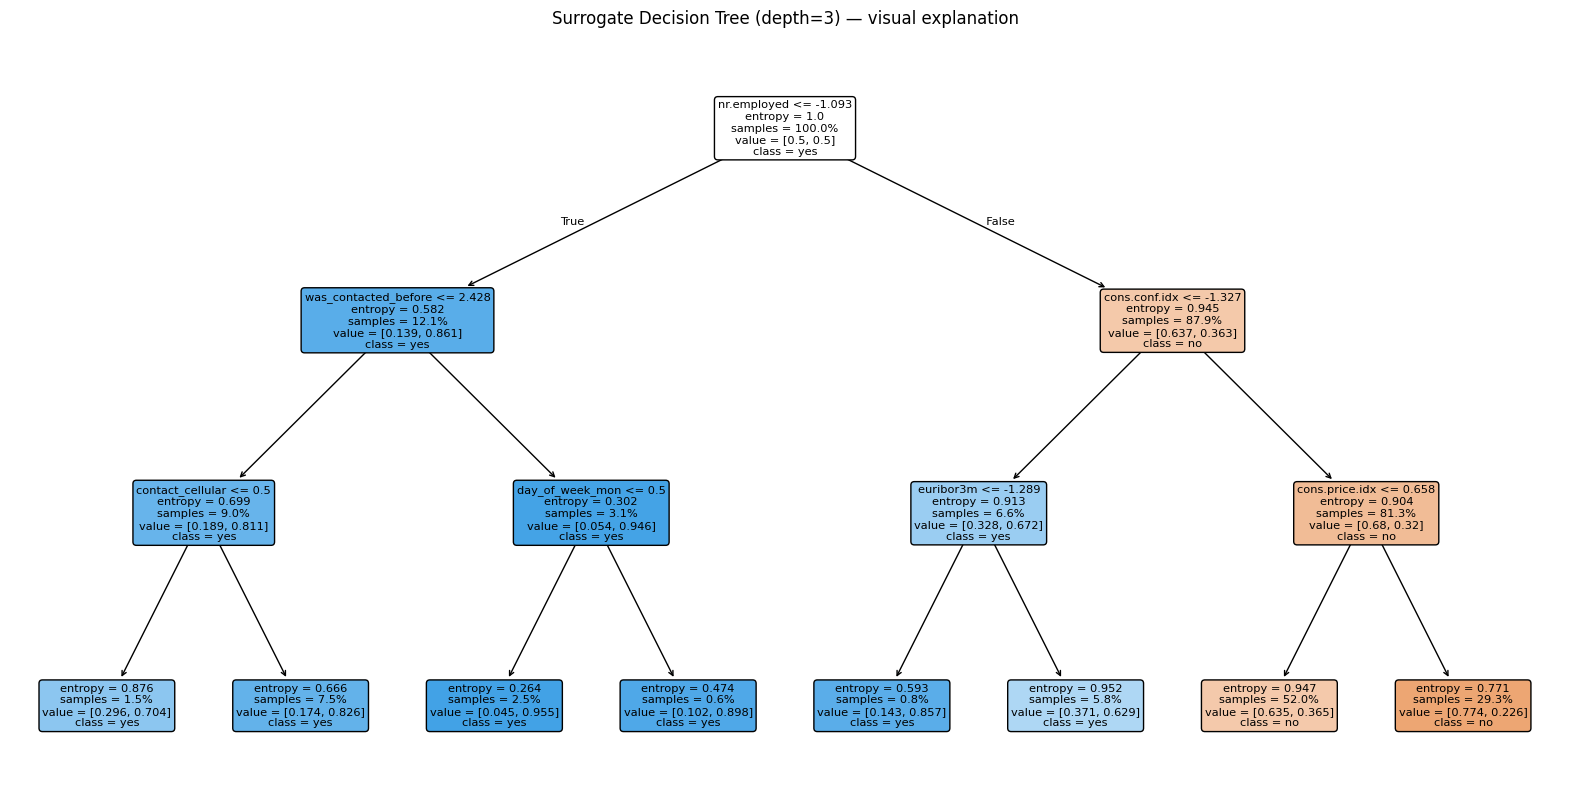

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

surrogate = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=3,
    min_samples_leaf=50,
    class_weight='balanced',
    random_state=42
)
surrogate.fit(X_train_prepared, y_train)

plt.figure(figsize=(20, 10))
plot_tree(
    surrogate,
    feature_names=X_train_prepared.columns,
    class_names=['no','yes'],
    filled=True, rounded=True, impurity=True, proportion=True
)
plt.title("Surrogate Decision Tree (depth=3) — visual explanation")
plt.show()

6.4. In luật phân tách (đọc logic bằng chữ)

In [ ]:
from sklearn.tree import export_text
rules = export_text(surrogate, feature_names=list(X_train_prepared.columns))
print(rules[:2000])  # in trước 2000 ký tự cho gọn; bỏ [:2000] nếu muốn full

|--- nr.employed <= -1.09
|   |--- was_contacted_before <= 2.43
|   |   |--- contact_cellular <= 0.50
|   |   |   |--- class: 1
|   |   |--- contact_cellular >  0.50
|   |   |   |--- class: 1
|   |--- was_contacted_before >  2.43
|   |   |--- day_of_week_mon <= 0.50
|   |   |   |--- class: 1
|   |   |--- day_of_week_mon >  0.50
|   |   |   |--- class: 1
|--- nr.employed >  -1.09
|   |--- cons.conf.idx <= -1.33
|   |   |--- euribor3m <= -1.29
|   |   |   |--- class: 1
|   |   |--- euribor3m >  -1.29
|   |   |   |--- class: 1
|   |--- cons.conf.idx >  -1.33
|   |   |--- cons.price.idx <= 0.66
|   |   |   |--- class: 0
|   |   |--- cons.price.idx >  0.66
|   |   |   |--- class: 0



7. Biểu đồ trực quan hóa kết quả Logistics regression

7.1. Biểu đồ hệ số (Top dương/âm)

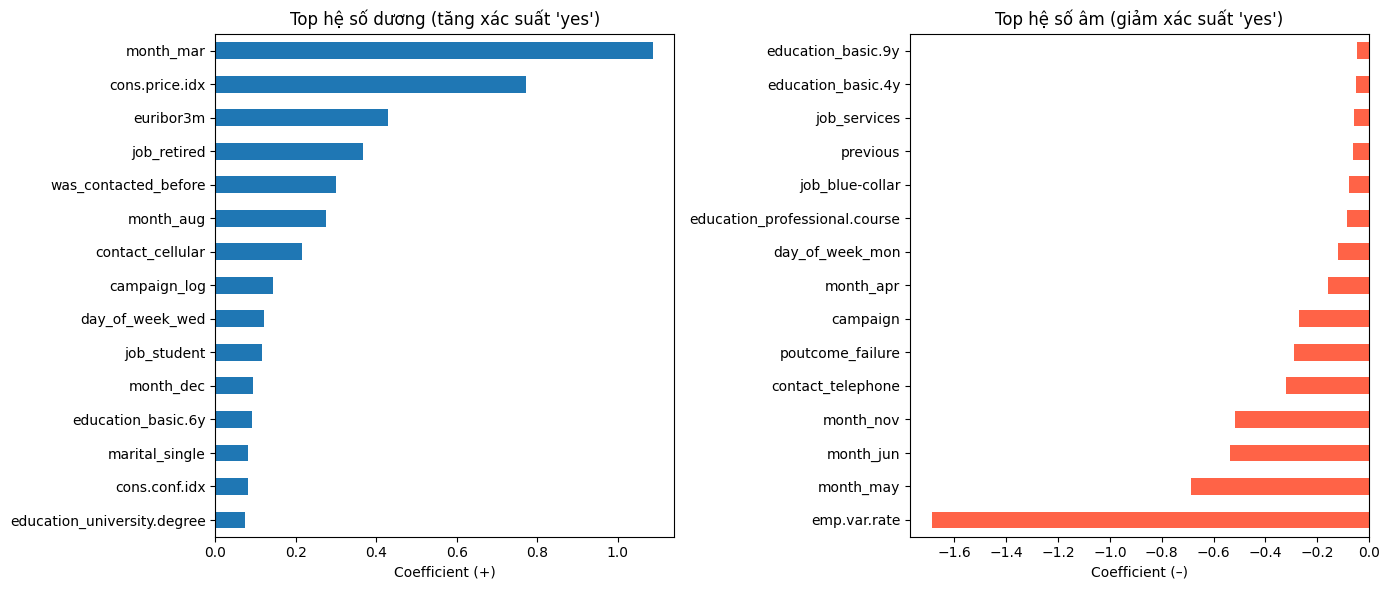

In [ ]:
# ==== Logistic Regression: Coefficient Bars ====
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Lấy model logistic hiện có
try:
    model_log = best_log
except NameError:
    model_log = log_base

coefs = pd.Series(model_log.coef_[0], index=X_train_prepared.columns)

# Top đẩy "yes" (dương) và kéo "no" (âm)
top_pos = coefs.sort_values(ascending=False).head(15)
top_neg = coefs.sort_values(ascending=True).head(15)

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=False)
top_pos.sort_values().plot(kind='barh', ax=axes[0])
axes[0].set_title("Top hệ số dương (tăng xác suất 'yes')")
axes[0].set_xlabel("Coefficient (+)")

top_neg.sort_values().plot(kind='barh', ax=axes[1], color='tomato')
axes[1].set_title("Top hệ số âm (giảm xác suất 'yes')")
axes[1].set_xlabel("Coefficient (–)")
plt.tight_layout()
plt.show()

33 features exceed |coef| threshold (0.1).


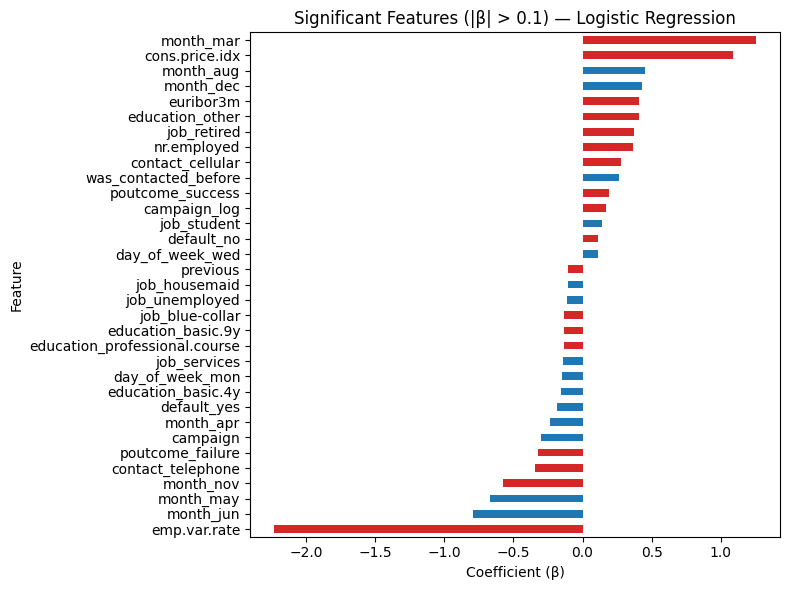

,0
emp.var.rate,-2.231021
month_mar,1.254638
cons.price.idx,1.092304
month_jun,-0.790276
month_may,-0.672513
month_nov,-0.573757
month_aug,0.448417
month_dec,0.431471
euribor3m,0.411422
education_other,0.410672


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Giả sử bạn đã có mô hình logistic regression tên best_log (hoặc log_base)
coef = pd.Series(best_log.coef_[0], index=X_train_prepared.columns)

# Lọc những feature có tác động đáng kể
threshold = 0.1  # tuỳ chỉnh: 0.05 hoặc 0.2 nếu bạn muốn lọc chặt/lỏng hơn
sig_coef = coef[coef.abs() > threshold].sort_values(key=abs, ascending=False)

if sig_coef.empty:
    sig_coef = coef.abs().sort_values(ascending=False).head(20)
    print(f"No coefficients exceed |{threshold}|; showing top 20 instead.")
else:
    print(f"{len(sig_coef)} features exceed |coef| threshold ({threshold}).")

# Vẽ biểu đồ
plt.figure(figsize=(8,6))
sig_coef.sort_values().plot(kind='barh', color=np.where(sig_coef > 0, '#1F77B4', '#D62728'))
plt.title(f"Significant Features (|β| > {threshold}) — Logistic Regression")
plt.xlabel("Coefficient (β)")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

display(sig_coef)

7.2. Bảng odds ratio (diễn giải dễ hiểu)

In [ ]:
# ==== Odds ratio = exp(coef) ====
odds = np.exp(coefs)
top_abs = coefs.sort_values(key=np.abs, ascending=False).head(15).index
display(pd.DataFrame({
    "coef": coefs.loc[top_abs],
    "odds_ratio = exp(coef)": odds.loc[top_abs]
}).sort_values(by="coef", ascending=False))

,coef,odds_ratio = exp(coef)
month_mar,1.086478,2.963816
cons.price.idx,0.772910,2.166061
euribor3m,0.428332,1.534695
job_retired,0.367835,1.444603
was_contacted_before,0.299866,1.349678
month_aug,0.274561,1.315953
contact_cellular,0.214636,1.239411
month_apr,-0.159775,0.852336
campaign,-0.268919,0.764205
poutcome_failure,-0.288996,0.749015


7.3. Partial Dependence Plot (PDP) cho một vài biến số

Giúp bạn có “đồ thị xu hướng” tương tự cách xem nhánh lớn của cây.

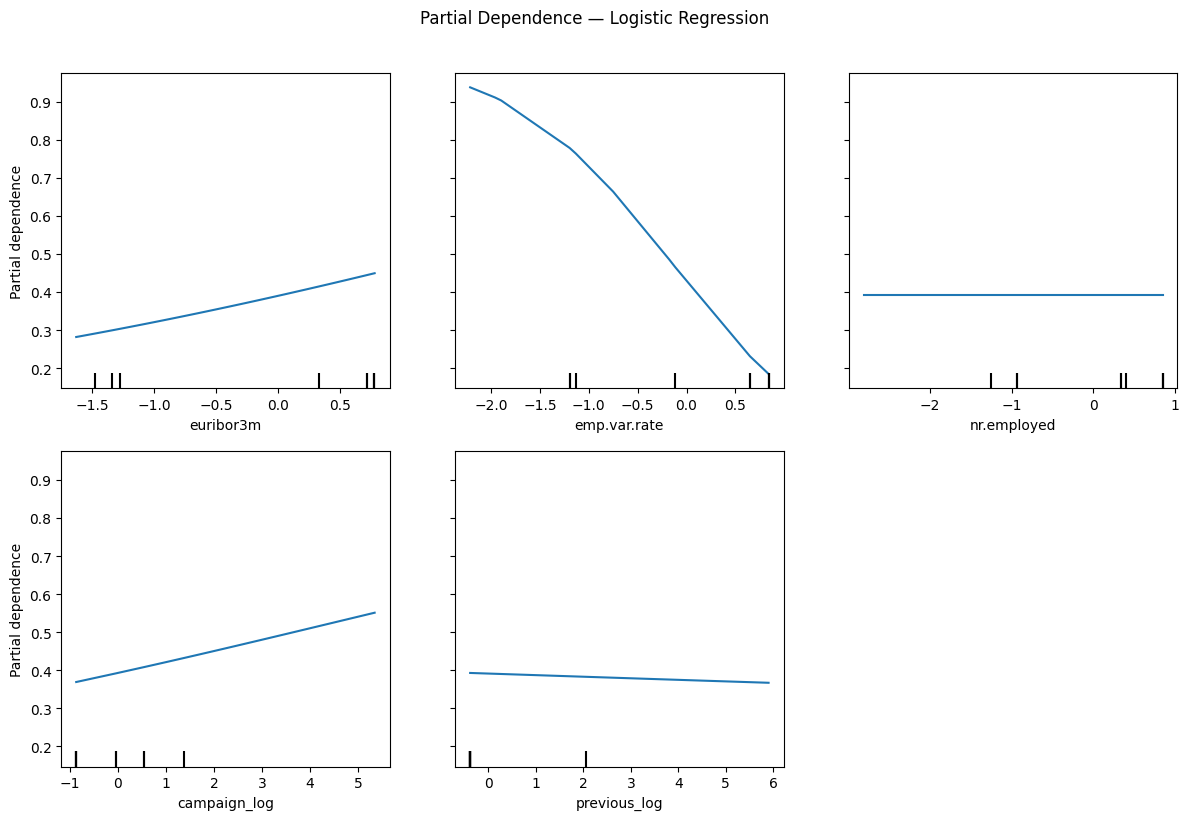

In [ ]:
# ==== Partial Dependence Plots (PDP) ====
from sklearn.inspection import PartialDependenceDisplay

# Chọn vài biến số tiêu biểu (đổi tên theo cột bạn có)
pdp_features = []
for c in ['euribor3m', 'emp.var.rate', 'nr.employed', 'campaign_log', 'previous_log']:
    if c in X_train_prepared.columns:
        pdp_features.append(c)

if pdp_features:
    fig, ax = plt.subplots(figsize=(12, 8))
    PartialDependenceDisplay.from_estimator(
        model_log, X_test_prepared, features=pdp_features, kind='average', ax=ax
    )
    plt.suptitle("Partial Dependence — Logistic Regression", y=1.02)
    plt.tight_layout()
    plt.show()
else:
    print("Không tìm thấy các cột PDP mẫu trong X_train_prepared.")

8. Alternative method - Random Forest

8.1. Baseline model


=== Random Forest (baseline) ===
Accuracy : 0.8946
Precision: 0.5630
Recall   : 0.2888
F1-score : 0.3818
ROC AUC  : 0.7832
Confusion Matrix:
 [[7102  208]
 [ 660  268]]
TP=268, FP=208, FN=660, TN=7102
Support (pos=928, neg=7310)


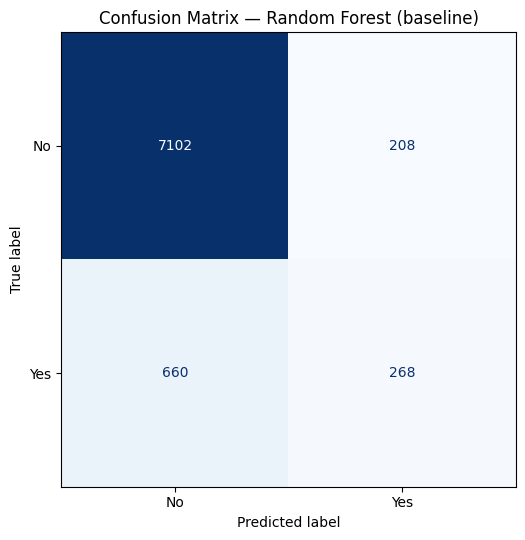

<Figure size 700x600 with 0 Axes>

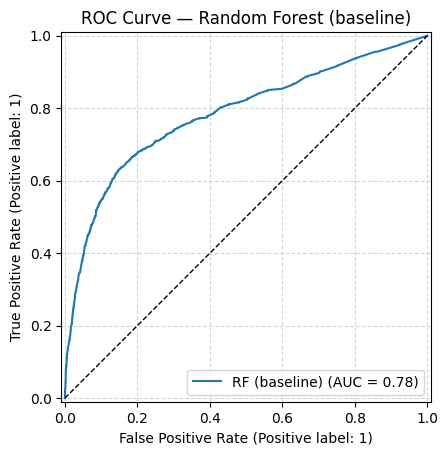

<Figure size 700x600 with 0 Axes>

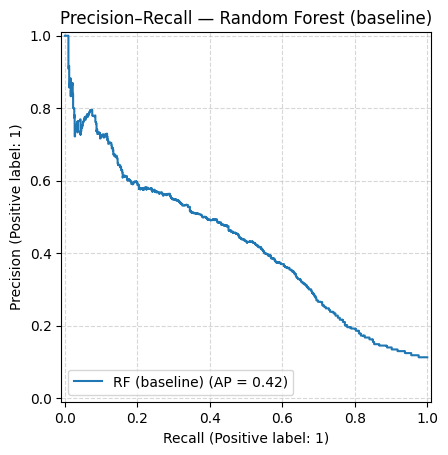


Top 20 Feature Importances — RF (baseline):


,0
age,0.141822
euribor3m,0.122616
nr.employed,0.063356
campaign_log,0.051084
campaign,0.050389
emp.var.rate,0.042105
cons.conf.idx,0.031416
cons.price.idx,0.024112
was_contacted_before,0.018881
housing_yes,0.018446


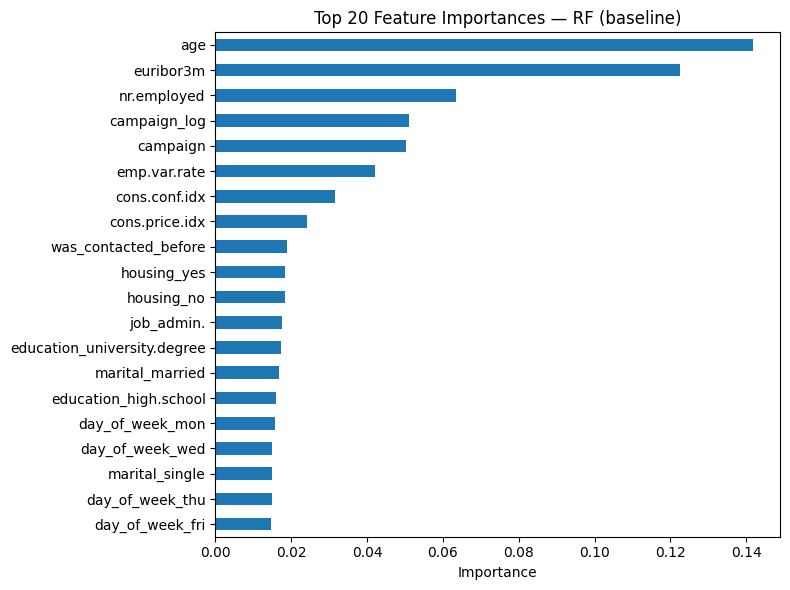

In [ ]:
# ==== RF-1: Baseline Random Forest ====
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import PrecisionRecallDisplay

rf_base = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',       # thường hiệu quả cho phân loại
    class_weight='balanced',   # xử lý mất cân bằng lớp
    bootstrap=True,
    n_jobs=-1,
    random_state=42
)
rf_base.fit(X_train_prepared, y_train)

# Dự đoán & đánh giá (ngưỡng 0.5)
y_proba_rf_base = rf_base.predict_proba(X_test_prepared)[:, 1]
y_pred_rf_base  = (y_proba_rf_base >= 0.5).astype(int)
_ = eval_model(y_test, y_pred_rf_base, y_proba_rf_base, "Random Forest (baseline)")

# ROC & PR curve
plt.figure(figsize=(7,6))
RocCurveDisplay.from_predictions(y_test, y_proba_rf_base, name="RF (baseline)")
plt.plot([0,1],[0,1],'k--',lw=1)
plt.title("ROC Curve — Random Forest (baseline)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

plt.figure(figsize=(7,6))
PrecisionRecallDisplay.from_predictions(y_test, y_proba_rf_base, name="RF (baseline)")
plt.title("Precision–Recall — Random Forest (baseline)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Top feature importances (bảng + biểu đồ)
fi_base = pd.Series(rf_base.feature_importances_, index=X_train_prepared.columns)\
          .sort_values(ascending=False)
print("\nTop 20 Feature Importances — RF (baseline):")
display(fi_base.head(20))

plt.figure(figsize=(8,6))
fi_base.head(20).sort_values().plot(kind='barh')
plt.title("Top 20 Feature Importances — RF (baseline)")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

8.2. GridSearchCV (Random Forest)

In [ ]:
# ==== RF-2: GridSearchCV (Random Forest) ====
from sklearn.model_selection import GridSearchCV

param_grid_rf = {
    "n_estimators":      [200, 400, 600],
    "max_depth":         [None, 8, 12, 16],
    "min_samples_split": [2, 10, 20],
    "min_samples_leaf":  [1, 5, 10],
    "max_features":      ["sqrt", 0.5],   # 0.5 = 50% số feature tại mỗi split
    "class_weight":      ["balanced"],
    "bootstrap":         [True]
}

rf_grid = GridSearchCV(
    estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
    param_grid=param_grid_rf,
    scoring="roc_auc",   # phù hợp dữ liệu lệch lớp
    cv=3,                # 3-fold cho nhanh; có thể dùng 5 nếu dư thời gian
    n_jobs=-1,
    verbose=1
)

rf_grid.fit(X_train_prepared, y_train)
best_rf = rf_grid.best_estimator_
print("\n✅ GridSearchCV (RF) done")
print("Best params:", rf_grid.best_params_)
print("Best CV ROC-AUC:", rf_grid.best_score_)


Fitting 3 folds for each of 216 candidates, totalling 648 fits


/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [ ]:
# ==== RF-5: Faster search with HalvingGridSearchCV (nếu không chạy được GridSearch ở trên vì lâu quá thì dùng lệnh này)====
from sklearn.experimental import enable_halving_search_cv  # noqa: F401
from sklearn.model_selection import HalvingGridSearchCV

halv_rf = HalvingGridSearchCV(
    RandomForestClassifier(n_jobs=-1, random_state=42),
    param_grid=param_grid_rf,
    factor=3,            # giữ lại ~1/3 cấu hình tốt sau mỗi vòng
    scoring="roc_auc",
    cv=3,
    n_jobs=-1,
    verbose=1
)
halv_rf.fit(X_train_prepared, y_train)
best_rf = halv_rf.best_estimator_
print("\n✅ HalvingGridSearchCV (RF) done")
print("Best params:", halv_rf.best_params_)
print("Best CV ROC-AUC:", halv_rf.best_score_)

n_iterations: 5
n_required_iterations: 5
n_possible_iterations: 5
min_resources_: 406
max_resources_: 32950
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 216
n_resources: 406
Fitting 3 folds for each of 216 candidates, totalling 648 fits
----------
iter: 1
n_candidates: 72
n_resources: 1218
Fitting 3 folds for each of 72 candidates, totalling 216 fits
----------
iter: 2
n_candidates: 24
n_resources: 3654
Fitting 3 folds for each of 24 candidates, totalling 72 fits
----------
iter: 3
n_candidates: 8
n_resources: 10962
Fitting 3 folds for each of 8 candidates, totalling 24 fits
----------
iter: 4
n_candidates: 3
n_resources: 32886
Fitting 3 folds for each of 3 candidates, totalling 9 fits

✅ HalvingGridSearchCV (RF) done
Best params: {'bootstrap': True, 'class_weight': 'balanced', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'min_samples_split': 20, 'n_estimators': 600}
Best CV ROC-AUC: 0.7955477577037499


8.3. Đánh giá mô hình RF tốt nhất + so sánh ROC


=== Random Forest (tuned) ===
Accuracy : 0.8492
Precision: 0.3952
Recall   : 0.6379
F1-score : 0.4880
ROC AUC  : 0.8095
Confusion Matrix:
 [[6404  906]
 [ 336  592]]
TP=592, FP=906, FN=336, TN=6404
Support (pos=928, neg=7310)


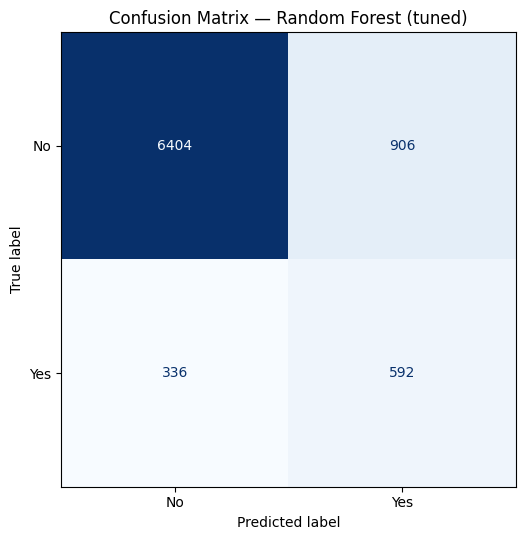

<Figure size 700x600 with 0 Axes>

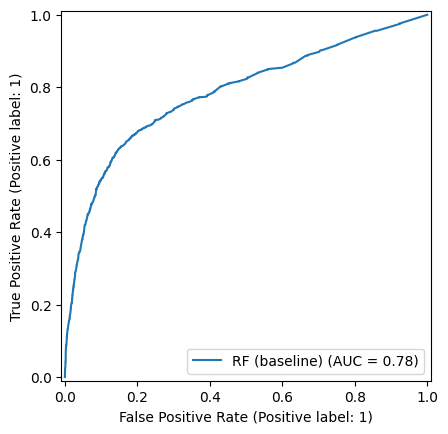

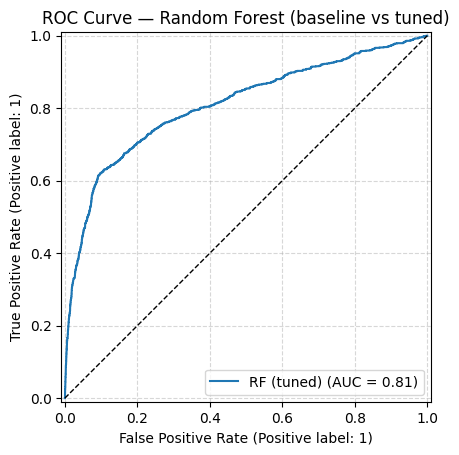


Top 25 Feature Importances — RF (tuned):


,0
nr.employed,0.200640
euribor3m,0.169891
emp.var.rate,0.121603
cons.conf.idx,0.079176
cons.price.idx,0.060091
was_contacted_before,0.056866
poutcome_success,0.044483
contact_telephone,0.025651
month_may,0.024569
contact_cellular,0.022004


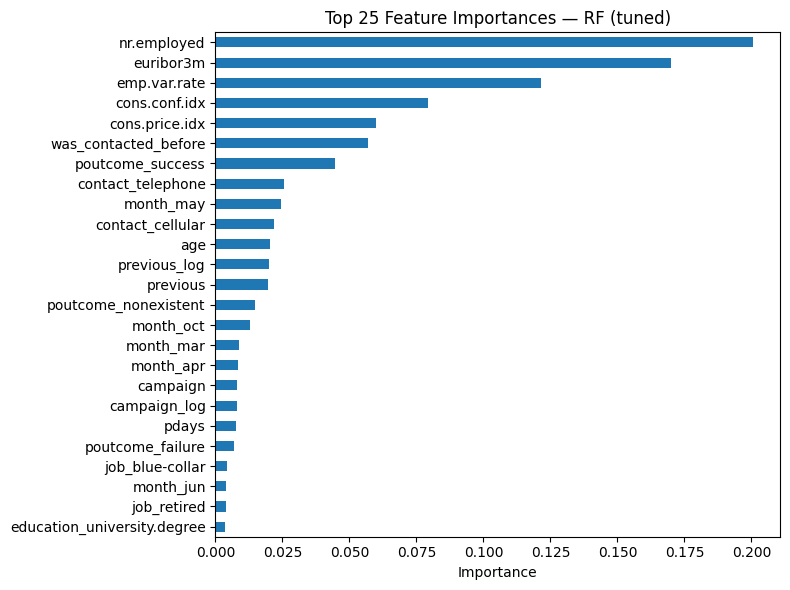

In [ ]:
# ==== RF-3: Evaluate tuned RF & ROC compare ====
y_proba_rf_best = best_rf.predict_proba(X_test_prepared)[:, 1]
y_pred_rf_best  = (y_proba_rf_best >= 0.5).astype(int)
_ = eval_model(y_test, y_pred_rf_best, y_proba_rf_best, "Random Forest (tuned)")

# So sánh ROC baseline vs tuned
plt.figure(figsize=(7,6))
RocCurveDisplay.from_predictions(y_test, y_proba_rf_base, name="RF (baseline)")
RocCurveDisplay.from_predictions(y_test, y_proba_rf_best, name="RF (tuned)")
plt.plot([0,1],[0,1],'k--',lw=1)
plt.title("ROC Curve — Random Forest (baseline vs tuned)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Importances sau tuning
fi_best = pd.Series(best_rf.feature_importances_, index=X_train_prepared.columns)\
          .sort_values(ascending=False)
print("\nTop 25 Feature Importances — RF (tuned):")
display(fi_best.head(25))

plt.figure(figsize=(8,6))
fi_best.head(25).sort_values().plot(kind='barh')
plt.title("Top 25 Feature Importances — RF (tuned)")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

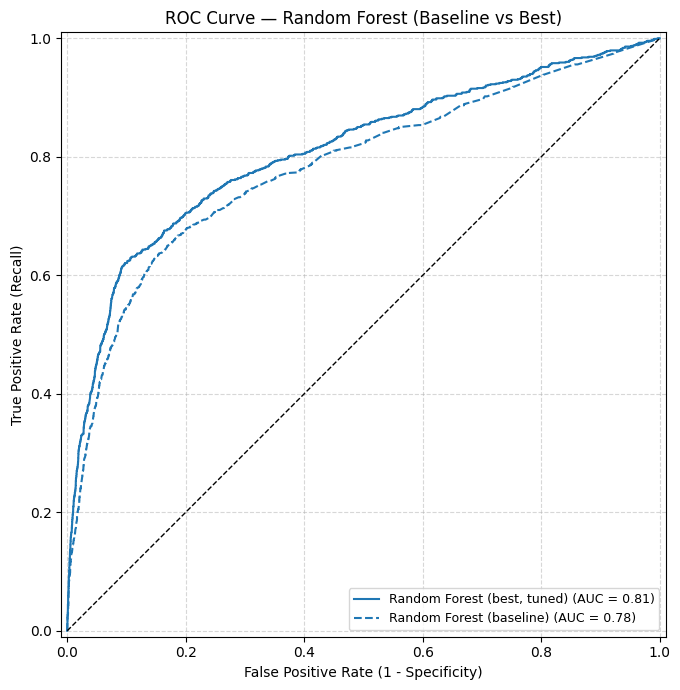

In [ ]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

# === ROC Curve — Random Forest (Baseline vs Best) ===
fig, ax = plt.subplots(figsize=(8,7))

# Best model (tuned, liền nét)
RocCurveDisplay.from_predictions(
    y_test, y_proba_rf_best,
    name="Random Forest (best, tuned)",
    color="#1f77b4", ax=ax
)

# Baseline model (đứt nét)
disp_rf_base = RocCurveDisplay.from_predictions(
    y_test, y_proba_rf_base,
    name="Random Forest (baseline)",
    color="#1f77b4", ax=ax
)
disp_rf_base.line_.set_linestyle("--")  # đường đứt nét

# Đường tham chiếu (random)
ax.plot([0,1], [0,1], 'k--', lw=1)

# Format biểu đồ
ax.set_title("ROC Curve — Random Forest (Baseline vs Best)")
ax.set_xlabel("False Positive Rate (1 - Specificity)")
ax.set_ylabel("True Positive Rate (Recall)")
ax.legend(loc="lower right", fontsize=9)
ax.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

8.4. Quét ngưỡng theo chi phí để chọn ngưỡng tối ưu


Top 5 threshold (min avg cost) — RF (tuned)


,threshold,avg_cost
0,0.36,0.484826
1,0.35,0.491988
2,0.37,0.495327
3,0.34,0.499332
4,0.38,0.501942



=== Summary at cost-optimal threshold — Random Forest ===


,Model,Threshold,Accuracy,Precision,Recall,F1,ROC_AUC,Avg_Cost
0,Random Forest (best @th*),0.36,0.723477,0.255612,0.760776,0.382656,0.809461,0.484826



🏆 RF WINNER @ threshold=0.360  (Avg Cost=0.484826, ROC-AUC=0.8095)


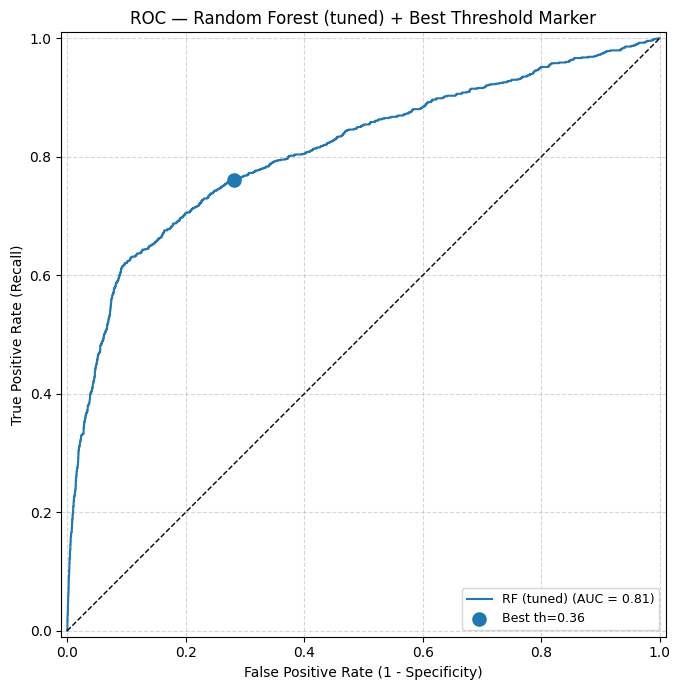

In [ ]:
# ===== RANDOM FOREST: Threshold sweep + summary + ROC marker =====
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score,
                             recall_score, f1_score, roc_auc_score, RocCurveDisplay)

# --- Cấu hình chi phí (điều chỉnh theo doanh nghiệp) ---
COST_FP = 1.5
COST_FN = 20.0
COST_TP = -5.0
COST_TN = 0.0

def expected_cost(y_true, y_proba, threshold=0.5):
    y_pred = (y_proba >= threshold).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    total_cost = tp*COST_TP + fp*COST_FP + fn*COST_FN + tn*COST_TN
    return total_cost / len(y_true)

def sweep_thresholds(y_true, y_proba, name, n_top=5):
    thresholds = np.linspace(0.01, 0.99, 99)
    rows = [{'threshold': t, 'avg_cost': expected_cost(y_true, y_proba, t)}
            for t in thresholds]
    df_cost = pd.DataFrame(rows).sort_values('avg_cost', ascending=True).reset_index(drop=True)
    print(f"\nTop {n_top} threshold (min avg cost) — {name}")
    display(df_cost.head(n_top))
    best_t  = float(df_cost.iloc[0]['threshold'])
    best_ac = float(df_cost.iloc[0]['avg_cost'])
    return best_t, best_ac, df_cost

def metrics_at(y_true, y_proba, th, name):
    y_pred = (y_proba >= th).astype(int)
    return {
        'Model': name,
        'Threshold': th,
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred, zero_division=0),
        'Recall': recall_score(y_true, y_pred, zero_division=0),
        'F1': f1_score(y_true, y_pred, zero_division=0),
        'ROC_AUC': roc_auc_score(y_true, y_proba),
        'Avg_Cost': expected_cost(y_true, y_proba, th)
    }

# ===== BƯỚC 1: Quét ngưỡng (dùng proba tuned; đổi sang y_proba_rf_base nếu muốn baseline) =====
rf_best_th, rf_best_cost, rf_cost_df = sweep_thresholds(y_test, y_proba_rf_best, "RF (tuned)")

# ===== BƯỚC 2: Tóm tắt metrics tại best threshold =====
rf_summary = pd.DataFrame([
    metrics_at(y_test, y_proba_rf_best, rf_best_th, "Random Forest (best @th*)")
]).sort_values('Avg_Cost', ascending=True).reset_index(drop=True)

print("\n=== Summary at cost-optimal threshold — Random Forest ===")
display(rf_summary)

winner_row = rf_summary.iloc[0]
print(f"\n🏆 RF WINNER @ threshold={winner_row['Threshold']:.3f}  "
      f"(Avg Cost={winner_row['Avg_Cost']:.6f}, ROC-AUC={winner_row['ROC_AUC']:.4f})")

# ===== (Tuỳ chọn) Vẽ ROC & đánh dấu điểm tại best threshold =====
fig, ax = plt.subplots(figsize=(8,7))
RocCurveDisplay.from_predictions(y_test, y_proba_rf_best, name="RF (tuned)", color="#1f77b4", ax=ax)

tn, fp, fn, tp = confusion_matrix(y_test, (y_proba_rf_best >= rf_best_th).astype(int)).ravel()
fpr = fp/(fp+tn) if (fp+tn)>0 else 0.0
tpr = tp/(tp+fn) if (tp+fn)>0 else 0.0
ax.scatter([fpr], [tpr], c="#1f77b4", s=90, marker="o", label=f"Best th={rf_best_th:.2f}")

ax.plot([0,1], [0,1], 'k--', lw=1)
ax.set_title("ROC — Random Forest (tuned) + Best Threshold Marker")
ax.set_xlabel("False Positive Rate (1 - Specificity)")
ax.set_ylabel("True Positive Rate (Recall)")
ax.legend(loc="lower right", fontsize=9)
ax.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout(); plt.show()


=== Cost-sensitive tuning — RF (baseline) ===
Best threshold: 0.07 | Min avg cost: 0.568
At best th — Acc:0.696  Prec:0.234  Rec:0.745  F1:0.356

=== Cost-sensitive tuning — RF (tuned) ===
Best threshold: 0.36 | Min avg cost: 0.485
At best th — Acc:0.723  Prec:0.256  Rec:0.761  F1:0.383


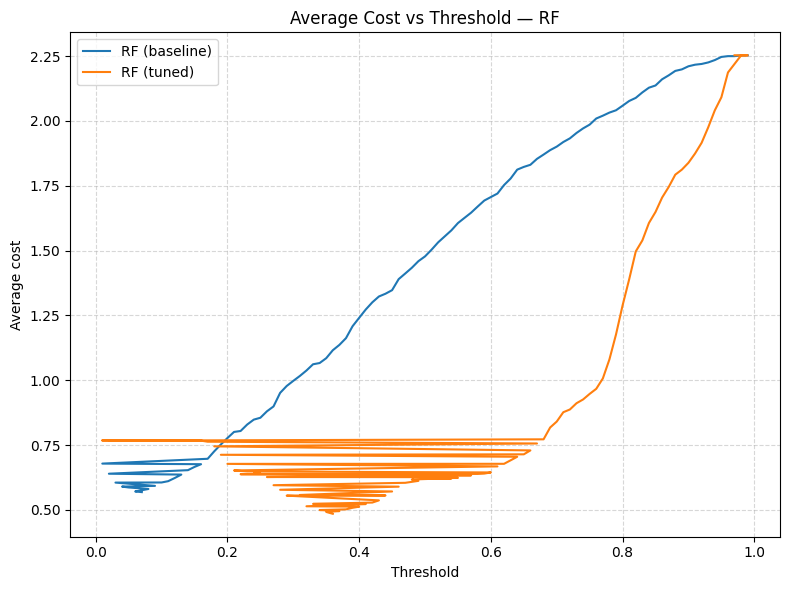

In [ ]:
# ==== RF-4: Cost-sensitive threshold sweep ====
def sweep_threshold_cost(y_true, y_proba, th_grid=np.linspace(0.01, 0.99, 99),
                         cost_fp=1.5, cost_fn=20.0, reward_tp=-5.0, cost_tn=0.0,
                         name="Model"):
    results = []
    for th in th_grid:
        y_pred = (y_proba >= th).astype(int)
        cm = confusion_matrix(y_true, y_pred)  # [[TN, FP], [FN, TP]]
        tn, fp, fn, tp = cm.ravel()
        total = tn + fp + fn + tp
        avg_cost = (fp*cost_fp + fn*cost_fn + tp*reward_tp + tn*cost_tn) / total

        acc  = accuracy_score(y_true, y_pred)
        prec = precision_score(y_true, y_pred, zero_division=0)
        rec  = recall_score(y_true, y_pred, zero_division=0)
        f1   = f1_score(y_true, y_pred, zero_division=0)

        results.append([th, avg_cost, acc, prec, rec, f1])
    df_cost = pd.DataFrame(results, columns=["threshold","avg_cost","acc","prec","rec","f1"])\
                 .sort_values("avg_cost")
    best = df_cost.iloc[0]
    print(f"\n=== Cost-sensitive tuning — {name} ===")
    print(f"Best threshold: {best.threshold:.2f} | Min avg cost: {best.avg_cost:.3f}")
    print(f"At best th — Acc:{best.acc:.3f}  Prec:{best.prec:.3f}  Rec:{best.rec:.3f}  F1:{best.f1:.3f}")
    return df_cost

# Chạy cho RF baseline & tuned
cost_rf_base = sweep_threshold_cost(y_test, y_proba_rf_base, name="RF (baseline)")
cost_rf_best = sweep_threshold_cost(y_test, y_proba_rf_best,  name="RF (tuned)")

# Vẽ đường avg_cost theo threshold
plt.figure(figsize=(8,6))
plt.plot(cost_rf_base["threshold"], cost_rf_base["avg_cost"], label="RF (baseline)")
plt.plot(cost_rf_best["threshold"], cost_rf_best["avg_cost"],  label="RF (tuned)")
plt.xlabel("Threshold"); plt.ylabel("Average cost")
plt.title("Average Cost vs Threshold — RF")
plt.grid(True, linestyle='--', alpha=0.5); plt.legend(); plt.tight_layout(); plt.show()

8.5. Features importance

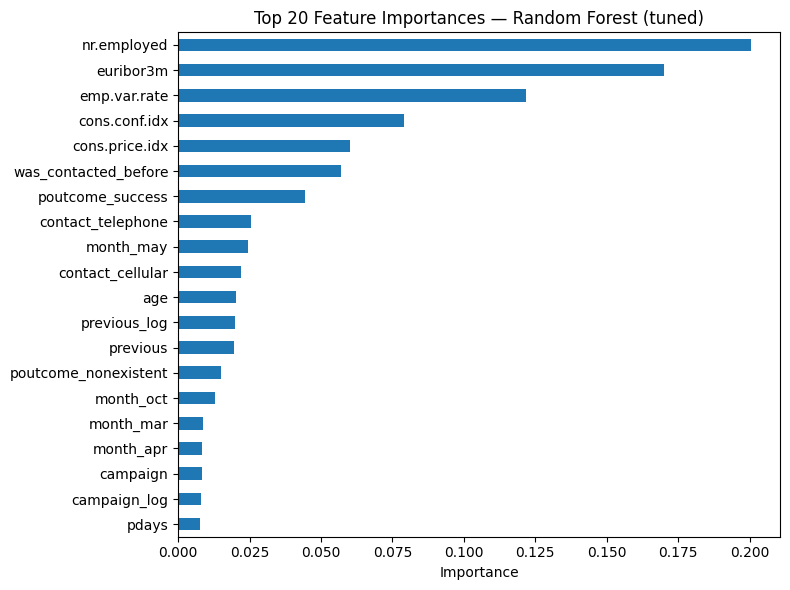

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

fi_rf = pd.Series(best_rf.feature_importances_, index=X_train_prepared.columns).sort_values(ascending=False)
plt.figure(figsize=(8,6))
fi_rf.head(20).sort_values().plot(kind='barh', color="#1f77b4")
plt.title("Top 20 Feature Importances — Random Forest (tuned)")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

9. Alternative method - Light GBM

9.1 Baseline model

[LightGBM] [Info] Number of positive: 3712, number of negative: 29238
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013857 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 486
[LightGBM] [Info] Number of data points in the train set: 32950, number of used features: 56
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000

=== LightGBM (baseline) ===
Accuracy : 0.8547
Precision: 0.4079
Recall   : 0.6422
F1-score : 0.4990
ROC AUC  : 0.8047
Confusion Matrix:
 [[6445  865]
 [ 332  596]]


<Figure size 700x600 with 0 Axes>

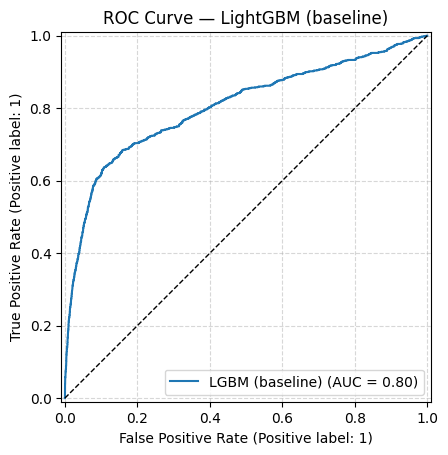

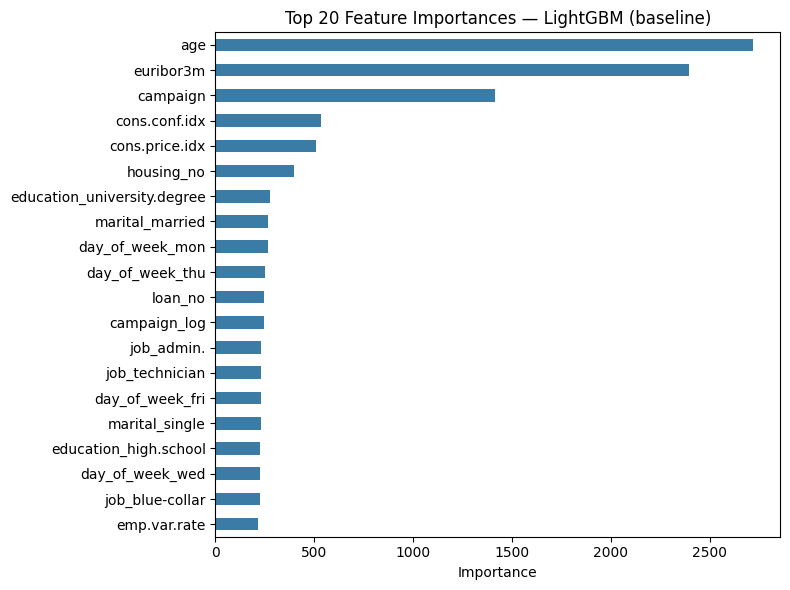

In [ ]:
# ==== LGBM-0: Import ====
import lightgbm as lgb
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, RocCurveDisplay, PrecisionRecallDisplay)
from sklearn.model_selection import GridSearchCV

# ==== LGBM-1: Baseline model ====
lgb_base = lgb.LGBMClassifier(
    objective='binary',
    boosting_type='gbdt',
    n_estimators=500,
    learning_rate=0.05,
    num_leaves=31,
    max_depth=-1,
    class_weight='balanced',    # xử lý mất cân bằng lớp
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1)
lgb_base.fit(X_train_prepared, y_train)

# Predict & evaluate
y_proba_lgb_base = lgb_base.predict_proba(X_test_prepared)[:, 1]
y_pred_lgb_base  = (y_proba_lgb_base >= 0.5).astype(int)

def eval_model(y_true, y_pred, y_proba, name):
    acc  = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, zero_division=0)
    rec  = recall_score(y_true, y_pred, zero_division=0)
    f1   = f1_score(y_true, y_pred, zero_division=0)
    auc  = roc_auc_score(y_true, y_proba)
    cm   = confusion_matrix(y_true, y_pred)
    print(f"\n=== {name} ===")
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1-score : {f1:.4f}")
    print(f"ROC AUC  : {auc:.4f}")
    print("Confusion Matrix:\n", cm)
    return {'Model': name, 'Accuracy': acc, 'Precision': prec, 'Recall': rec, 'F1': f1, 'ROC_AUC': auc}

_ = eval_model(y_test, y_pred_lgb_base, y_proba_lgb_base, "LightGBM (baseline)")

# ROC curve
plt.figure(figsize=(7,6))
RocCurveDisplay.from_predictions(y_test, y_proba_lgb_base, name="LGBM (baseline)")
plt.plot([0,1],[0,1],'k--',lw=1)
plt.title("ROC Curve — LightGBM (baseline)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Feature importance
importances = pd.Series(lgb_base.feature_importances_, index=X_train_prepared.columns)\
               .sort_values(ascending=False)
plt.figure(figsize=(8,6))
importances.head(20).sort_values().plot(kind='barh', color="#3A7CA5")
plt.title("Top 20 Feature Importances — LightGBM (baseline)")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

9.2. GridSearchCV (tuning LightGBM)

LightGBM có nhiều tham số hơn Decision Tree và RF

In [ ]:
# ==== LGBM-2: GridSearchCV ====
param_grid_lgb = {
    'n_estimators': [300, 500, 700],
    'learning_rate': [0.05, 0.1],
    'num_leaves': [31, 63, 127],
    'max_depth': [-1, 8, 12],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.7, 0.9],
    'class_weight': ['balanced']}

lgb_est = lgb.LGBMClassifier(
    objective='binary',
    boosting_type='gbdt',
    random_state=42,
    n_jobs=-1)

grid_lgb = GridSearchCV(
    estimator=lgb_est,
    param_grid=param_grid_lgb,
    scoring='roc_auc',
    cv=3,
    n_jobs=-1,
    verbose=1)

grid_lgb.fit(X_train_prepared, y_train)

print("\n✅ GridSearchCV (LightGBM) done")
print("Best params:", grid_lgb.best_params_)
print("Best CV ROC-AUC:", grid_lgb.best_score_)

best_lgb = grid_lgb.best_estimator_

Fitting 3 folds for each of 216 candidates, totalling 648 fits
[LightGBM] [Info] Number of positive: 3712, number of negative: 29238
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005953 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 486
[LightGBM] [Info] Number of data points in the train set: 32950, number of used features: 56
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000

✅ GridSearchCV (LightGBM) done
Best params: {'class_weight': 'balanced', 'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 12, 'n_estimators': 300, 'num_leaves': 31, 'subsample': 0.8}
Best CV ROC-AUC: 0.7865383126868206


9.3. Evaluate tuned LightGBM


=== LightGBM (tuned) ===
Accuracy : 0.8528
Precision: 0.4044
Recall   : 0.6498
F1-score : 0.4986
ROC AUC  : 0.8084
Confusion Matrix:
 [[6422  888]
 [ 325  603]]


<Figure size 700x600 with 0 Axes>

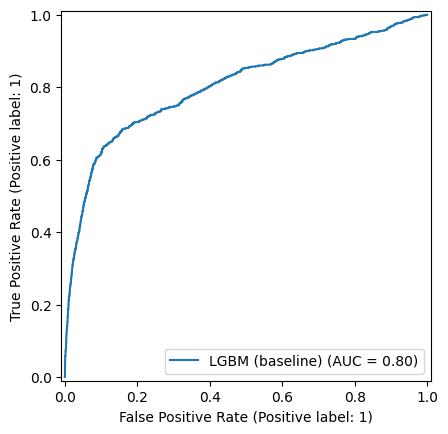

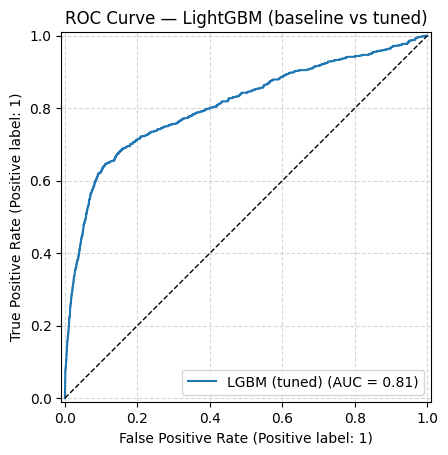

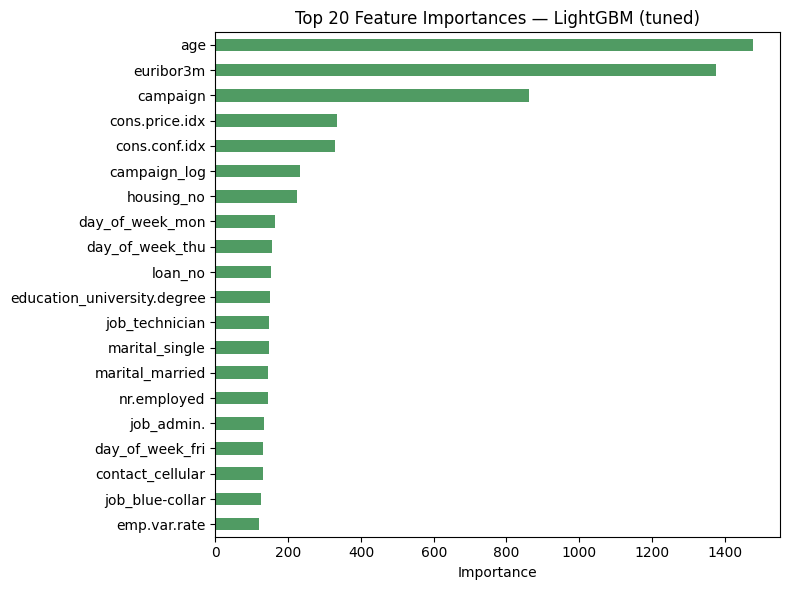

In [ ]:
# ==== LGBM-3: Evaluate tuned LightGBM ====
y_proba_lgb_best = best_lgb.predict_proba(X_test_prepared)[:, 1]
y_pred_lgb_best  = (y_proba_lgb_best >= 0.5).astype(int)
_ = eval_model(y_test, y_pred_lgb_best, y_proba_lgb_best, "LightGBM (tuned)")

# ROC curve comparison
plt.figure(figsize=(7,6))
RocCurveDisplay.from_predictions(y_test, y_proba_lgb_base, name="LGBM (baseline)")
RocCurveDisplay.from_predictions(y_test, y_proba_lgb_best, name="LGBM (tuned)")
plt.plot([0,1],[0,1],'k--',lw=1)
plt.title("ROC Curve — LightGBM (baseline vs tuned)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Feature importance after tuning
importances_best = pd.Series(best_lgb.feature_importances_, index=X_train_prepared.columns)\
                    .sort_values(ascending=False)
plt.figure(figsize=(8,6))
importances_best.head(20).sort_values().plot(kind='barh', color="#509B63")
plt.title("Top 20 Feature Importances — LightGBM (tuned)")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

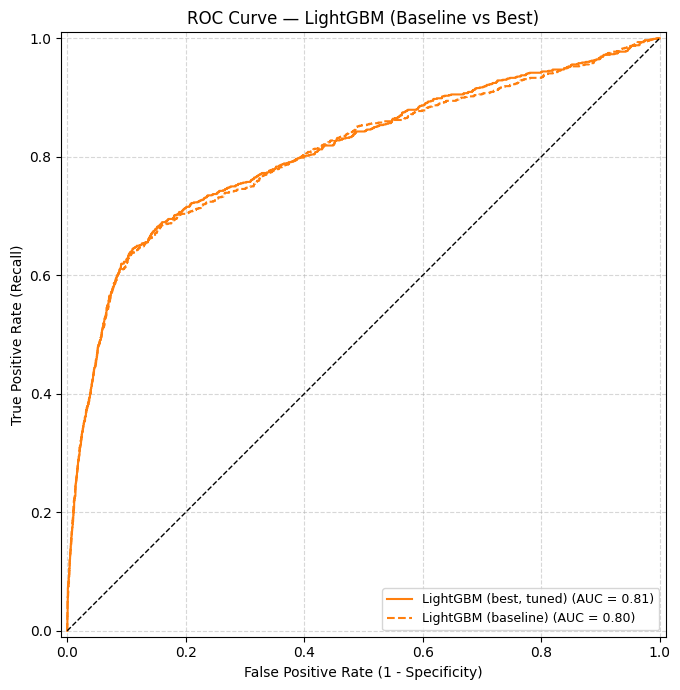

In [ ]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

# === ROC Curve — LightGBM (Baseline vs Best) ===
fig, ax = plt.subplots(figsize=(8,7))

# Best model (tuned, liền nét)
RocCurveDisplay.from_predictions(
    y_test, y_proba_lgb_best,
    name="LightGBM (best, tuned)",
    color="#ff7f0e", ax=ax
)

# Baseline model (đứt nét)
disp_lgb_base = RocCurveDisplay.from_predictions(
    y_test, y_proba_lgb_base,
    name="LightGBM (baseline)",
    color="#ff7f0e", ax=ax
)
disp_lgb_base.line_.set_linestyle("--")

# Đường tham chiếu (random)
ax.plot([0,1], [0,1], 'k--', lw=1)

# Format biểu đồ
ax.set_title("ROC Curve — LightGBM (Baseline vs Best)")
ax.set_xlabel("False Positive Rate (1 - Specificity)")
ax.set_ylabel("True Positive Rate (Recall)")
ax.legend(loc="lower right", fontsize=9)
ax.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

9.4. Cost-sensitive threshold tuning


Top 5 threshold (min avg cost) — LightGBM (tuned)


,threshold,avg_cost
0,0.40,0.501032
1,0.38,0.506191
2,0.37,0.507647
3,0.39,0.508437
4,0.41,0.509286



=== Summary at cost-optimal threshold — LightGBM ===


,Model,Threshold,Accuracy,Precision,Recall,F1,ROC_AUC,Avg_Cost
0,LightGBM (best @th*),0.4,0.781136,0.302483,0.721983,0.426344,0.808384,0.501032



🏆 LGBM WINNER @ threshold=0.400  (Avg Cost=0.501032, ROC-AUC=0.8084)


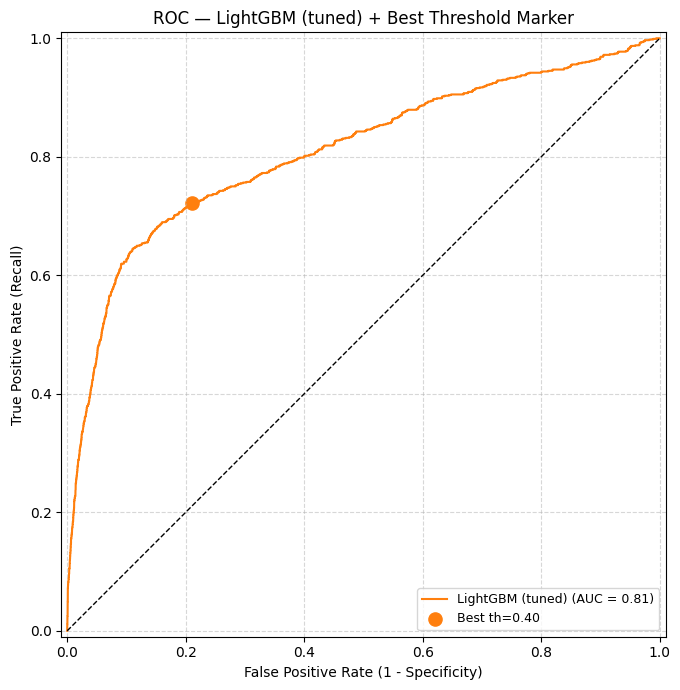

In [ ]:
# ===== LIGHTGBM: Threshold sweep + summary + ROC marker =====
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score,
                             recall_score, f1_score, roc_auc_score, RocCurveDisplay)

# --- Cấu hình chi phí (điều chỉnh theo doanh nghiệp) ---
COST_FP = 1.5
COST_FN = 20.0
COST_TP = -5.0
COST_TN = 0.0

def expected_cost(y_true, y_proba, threshold=0.5):
    y_pred = (y_proba >= threshold).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    total_cost = tp*COST_TP + fp*COST_FP + fn*COST_FN + tn*COST_TN
    return total_cost / len(y_true)

def sweep_thresholds(y_true, y_proba, name, n_top=5):
    thresholds = np.linspace(0.01, 0.99, 99)
    rows = [{'threshold': t, 'avg_cost': expected_cost(y_true, y_proba, t)}
            for t in thresholds]
    df_cost = pd.DataFrame(rows).sort_values('avg_cost', ascending=True).reset_index(drop=True)
    print(f"\nTop {n_top} threshold (min avg cost) — {name}")
    display(df_cost.head(n_top))
    best_t  = float(df_cost.iloc[0]['threshold'])
    best_ac = float(df_cost.iloc[0]['avg_cost'])
    return best_t, best_ac, df_cost

def metrics_at(y_true, y_proba, th, name):
    y_pred = (y_proba >= th).astype(int)
    return {
        'Model': name,
        'Threshold': th,
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred, zero_division=0),
        'Recall': recall_score(y_true, y_pred, zero_division=0),
        'F1': f1_score(y_true, y_pred, zero_division=0),
        'ROC_AUC': roc_auc_score(y_true, y_proba),
        'Avg_Cost': expected_cost(y_true, y_proba, th)
    }

# ===== BƯỚC 1: Quét ngưỡng (dùng proba tuned; đổi sang y_proba_lgb_base nếu muốn baseline) =====
lgb_best_th, lgb_best_cost, lgb_cost_df = sweep_thresholds(y_test, y_proba_lgb_best, "LightGBM (tuned)")

# ===== BƯỚC 2: Tóm tắt metrics tại best threshold =====
lgb_summary = pd.DataFrame([
    metrics_at(y_test, y_proba_lgb_best, lgb_best_th, "LightGBM (best @th*)")
]).sort_values('Avg_Cost', ascending=True).reset_index(drop=True)

print("\n=== Summary at cost-optimal threshold — LightGBM ===")
display(lgb_summary)

winner_row = lgb_summary.iloc[0]
print(f"\n🏆 LGBM WINNER @ threshold={winner_row['Threshold']:.3f}  "
      f"(Avg Cost={winner_row['Avg_Cost']:.6f}, ROC-AUC={winner_row['ROC_AUC']:.4f})")

# ===== (Tuỳ chọn) Vẽ ROC & đánh dấu điểm tại best threshold =====
fig, ax = plt.subplots(figsize=(8,7))
RocCurveDisplay.from_predictions(y_test, y_proba_lgb_best, name="LightGBM (tuned)", color="#ff7f0e", ax=ax)

tn, fp, fn, tp = confusion_matrix(y_test, (y_proba_lgb_best >= lgb_best_th).astype(int)).ravel()
fpr = fp/(fp+tn) if (fp+tn)>0 else 0.0
tpr = tp/(tp+fn) if (tp+fn)>0 else 0.0
ax.scatter([fpr], [tpr], c="#ff7f0e", s=90, marker="o", label=f"Best th={lgb_best_th:.2f}")

ax.plot([0,1], [0,1], 'k--', lw=1)
ax.set_title("ROC — LightGBM (tuned) + Best Threshold Marker")
ax.set_xlabel("False Positive Rate (1 - Specificity)")
ax.set_ylabel("True Positive Rate (Recall)")
ax.legend(loc="lower right", fontsize=9)
ax.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout(); plt.show()


=== Cost-sensitive tuning — LightGBM (tuned) ===
Best threshold: 0.40 | Min avg cost: 0.501
At best th — Acc:0.781  Prec:0.302  Rec:0.722  F1:0.426


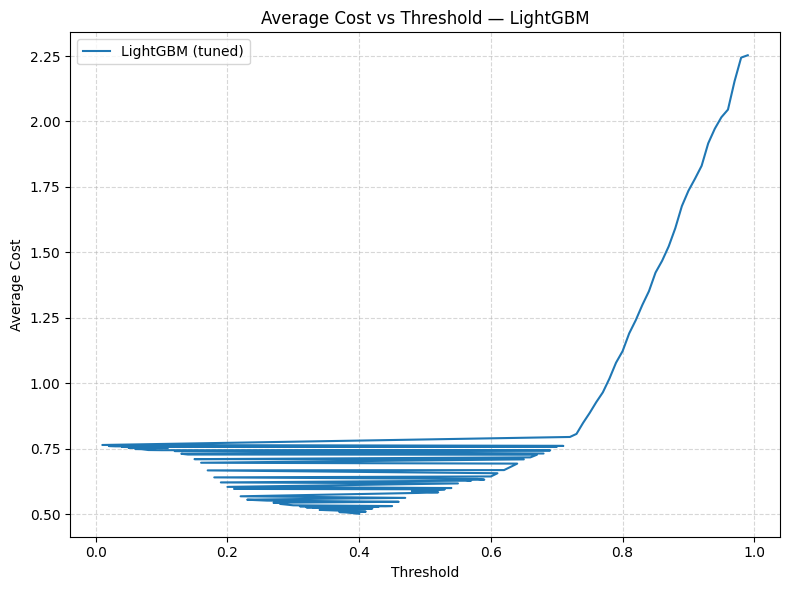

In [ ]:
# ==== LGBM-4: Cost-sensitive threshold tuning ====
def sweep_threshold_cost(y_true, y_proba, th_grid=np.linspace(0.01, 0.99, 99),
                         cost_fp=1.5, cost_fn=20.0, reward_tp=-5.0, cost_tn=0.0,
                         name="Model"):
    results = []
    for th in th_grid:
        y_pred = (y_proba >= th).astype(int)
        cm = confusion_matrix(y_true, y_pred)
        tn, fp, fn, tp = cm.ravel()
        total = tn + fp + fn + tp
        avg_cost = (fp*cost_fp + fn*cost_fn + tp*reward_tp + tn*cost_tn) / total
        acc  = accuracy_score(y_true, y_pred)
        prec = precision_score(y_true, y_pred, zero_division=0)
        rec  = recall_score(y_true, y_pred, zero_division=0)
        f1   = f1_score(y_true, y_pred, zero_division=0)
        results.append([th, avg_cost, acc, prec, rec, f1])
    df_cost = pd.DataFrame(results, columns=["threshold","avg_cost","acc","prec","rec","f1"])\
                 .sort_values("avg_cost")
    best = df_cost.iloc[0]
    print(f"\n=== Cost-sensitive tuning — {name} ===")
    print(f"Best threshold: {best.threshold:.2f} | Min avg cost: {best.avg_cost:.3f}")
    print(f"At best th — Acc:{best.acc:.3f}  Prec:{best.prec:.3f}  Rec:{best.rec:.3f}  F1:{best.f1:.3f}")
    return df_cost

# Run tuning
cost_lgb_best = sweep_threshold_cost(y_test, y_proba_lgb_best, name="LightGBM (tuned)")

# Plot cost curve
plt.figure(figsize=(8,6))
plt.plot(cost_lgb_best["threshold"], cost_lgb_best["avg_cost"], label="LightGBM (tuned)")
plt.xlabel("Threshold"); plt.ylabel("Average Cost")
plt.title("Average Cost vs Threshold — LightGBM")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(); plt.tight_layout(); plt.show()

9.5. Features importance

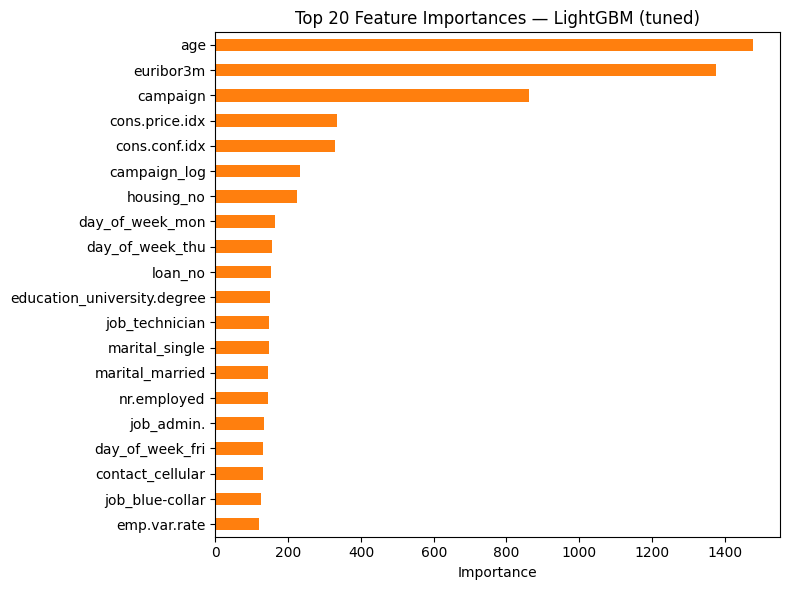

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

fi_lgb = pd.Series(best_lgb.feature_importances_, index=X_train_prepared.columns).sort_values(ascending=False)
plt.figure(figsize=(8,6))
fi_lgb.head(20).sort_values().plot(kind='barh', color="#ff7f0e")
plt.title("Top 20 Feature Importances — LightGBM (tuned)")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()